<h1 style="font-size:40px;"><center>Exercise III:<br> Convolutional and Recurrent Neural Networks
</center></h1>

## Short summary
In this exercise you will: 

* Train CNNs for a binary classification problem
* Visualize how CNN interprets the data
* Train a CNNs for two 3-class classification problem
* Train RNN on a time series prediction problem
* Visualize how RNN hidden node activities
* Sample from a RNN character model

In this lab we will look at network architectures that are designed to handle specific kinds of data. Convolutional Neural Networks for image processing and Recurrent Neural Networks for time series processing

**Deadline for submitting the report: January 3, 13:00 (2022)**

## The data
Digits "5" and "6" from the MNIST database used for a binary classification problem.

A dataset consisting of circles, rectangles or triangles, that can be read using the *loadImagesCRT* function.

A dataset consisting of three different types of rectangles, squares, "horizontal" rectangles and "vertical" rectangles. This data can be read using the *loadImagesR3* function.

A dataset consisting of pairs of times series. The input time series is a train of rectangle pulses, and the output is triangles, i.e. an up-ramp followed by a down-ramp. For more details see the cell *Ex4-1*. The task is to train a recurrent network that predicts the triangle time series from the pulse time series.

The last exercise is using the Tensorflow source code (C++) represented as a long sequence of characters. See that cell for more details.

## The exercises
As for the previous lab all exercises are found below.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Data | Needed | Loading images for the CNN exercise |
| 3 | PlotImg | Information  | View some of the images |
| 4 | Stats | Needed | Compute classification results |
| 5 | Visualization | Needed | Visualize layers of a CNN |
| 6 | Ex1 | Exercise | For question 1-2 |
| 7 | Ex2 | Exercise | For question 3 |
| 8 | Ex3 | Exercise | For question 4-5 |
| 9 | Ex4-1 | Exercise | For question 6-9 |
| 10 | Ex4-2 | Exercise | For question 6-9 |
| 11 | Ex4-3 | Exercise | For question 6-9 |
| 12 | Ex5-1 | Exercise | For question 10-11 |
| 13 | Ex5-2 | Exercise | For question 10-11 |


In order for you to start with the exercise you need to run all cells with the CellType "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun again!




### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries
In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".


In [1]:
import numpy as np
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt

from keras.utils.vis_utils import plot_model

In [2]:
import http.client, urllib

# For sending notificaions to phone
def send_notification(msg):
    conn = http.client.HTTPSConnection("api.pushover.net:443")
    conn.request("POST", "/1/messages.json",
    urllib.parse.urlencode({
        "token": "a5q12f2nj9pdfbaxvmm64757q3vjbh",
        "user": "u4ufbp25keokecz5c3fcpy3yuo6cr9",
        "message": msg,
    }), { "Content-type": "application/x-www-form-urlencoded" })
    conn.getresponse()
    print("Notification sent to phone")

### CellName: Data (#2)
### CellType: Needed
### Cell instruction: Function for getting images for the CNN exercises

This cell defines the functions that obtain the images needed for the CNN exercise. Note! Later when you actually call these function, if it can't find the files, make sure the "crt-trn/" and "crt-tst/" folders are available in the same directory as this notebook file.

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def load_pics(folder,N):
    import imageio
    imgs = []
    for i in range(N):
        img = imageio.imread(folder+"img_{:05}.png".format(i+1))
        ch = img[:,:,0]
        imgs.append(ch)
    return np.array(imgs)

def load_labels(fn):
    return np.loadtxt(fn, usecols=(0,1,2))

def loadImagesCRT():
    base = "./"
    trainpic = load_pics(base + "crt-trn/", 500)
    valpic = load_pics(base + "crt-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"crt-trn_trg.csv")
    #ytrain = ytrain[:N]
    yval = load_labels(base+"crt-val_trg.csv")
    
    return xtrain, ytrain, xval, yval, width, height

def loadImagesR3():
    base = "./"
    trainpic = load_pics(base + "r3-trn/", 500)
    valpic = load_pics(base + "r3-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"r3-trn_trg.csv")
    #ytrain = ytrain[:500]
    yval = load_labels(base+"r3-val_trg.csv")

    return xtrain, ytrain, xval, yval, width, height


def loadMNIST56():
    xtrain, ytrain, xval, yval = np.load("mnist56.npy", allow_pickle=True)
    width, height = xtrain.shape[1:3]
    return xtrain, ytrain, xval, yval, width, height


### CellName: PlotImg (#3)
### CellType: Information
### Cell instruction: Show some of the images

Here we look at the first ten pictures in the training set, and their respective targets. You can select the dataset to look at by uncomment the correct line.

Run the cell by entering into the cell and press "CTRL Enter".

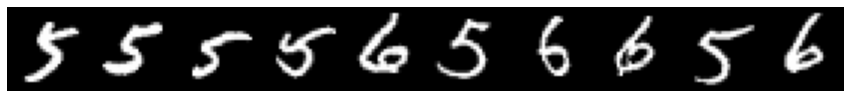

Targets:
[0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]


In [4]:
xTrn, dTrn, xVal, dVal, width, height = loadMNIST56()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesCRT()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesR3()

rndSel = np.random.randint(500, size=10)
plt.figure(1, figsize=(15,10))
plt.imshow(xTrn[rndSel,:,:].swapaxes(0,1).reshape(width,10*height),cmap="gray")
plt.axis("off")
plt.show()

print("Targets:")
print(dTrn[rndSel])


### CellName: Stats (#4)
### CellType: Needed
### Cell instruction: Get binary and 3-class classification results

This cell just defines functions that we can call to compute som performance measures for binary and 3-class classification problems.

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def binary_pred_stats(ytrue, ypred, threshold=0.5):
    one_correct = np.sum((ytrue==1)*(ypred > threshold))
    zero_correct = np.sum((ytrue==0)*(ypred <= threshold))
    sensitivity = one_correct / np.sum(ytrue==1)
    specificity = zero_correct / np.sum(ytrue==0)
    accuracy = (one_correct + zero_correct) / len(ytrue)
    return sensitivity, specificity, accuracy

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)


### CellName: Visualization (#5)
### CellType: Needed
### Cell instruction: Function that can visualize the different layers of a CNN

This cell is feeding an image through a CNN and stores the intemediate values. It plots the different layers (filtered images) either before or after maxpooling.

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def layerVisaliztion(model,
                     indata,
                     target,
                     idx=10,
                     post_pool = False):

    # The prediction for the test case
    #idx_pred = model.predict(indata)[idx,0]
    #print('True label: = {:0.1f}, Prediction = {:0.8f}'.format(idx_pred, target[idx]))
    
    print('Prediction: ', model.predict(indata)[idx])
    print('Target    : ', target[idx])
    
    kind = MaxPooling2D if post_pool else Conv2D
    outs = [l.output for l in model.layers if isinstance(l, kind)]
    intermediate = K.function([model.layers[0].input], outs)
    
    states = [indata[idx:idx+1]] + intermediate([indata[idx:idx+1]])
    plt.figure(figsize=(18,12))                    
    for k,s in enumerate(states):
        plt.figure(figsize=(18,12))
        plt.subplot(len(outs)+1,1,k+1)
        pics = s[0]
        pics = np.rollaxis(pics,2,0)
        rows = 2 if pics.shape[0] > 8 else 1
        cols = pics.shape[0]//rows
        pad = pics.shape[0]-rows*cols
        if pad > 0:
            padding = np.zeros_like(pics, shape=(rows-pad,)+pics.shape[1:])
            pics = np.concatenate([pics, padding])
            cols = cols + 1            
        imgshape = pics.shape[1:]
        pics = pics.reshape((rows,cols)+imgshape)
        pics = pics.swapaxes(1,2)
        pics = pics.reshape((pics.shape[0]*pics.shape[1], pics.shape[2]*pics.shape[3]))
        extent = (0,cols*imgshape[0], 0,rows*imgshape[1])
        plt.imshow(pics,cmap='gray',extent=extent)
        for r in range(1,rows):
            plt.plot([0,cols*imgshape[0]], [r*imgshape[1], r*imgshape[1]], color='r', linestyle='-', linewidth=1)
        for c in range(1,cols):
            plt.plot([c*imgshape[0], c*imgshape[0]], [0,rows*imgshape[1]], color='r', linestyle='-', linewidth=1)


### CellName: Ex1 (#6)
### CellType: Exercise
### Cell instruction: Instructions for question 1-2

## CNN for image classification

In this first exercise you are going to train a CNN that can separate between numbers "5" and "6" from the mnist dataset (mnist56 dataset). We are going to use 2000 training images and 1850 validation images. To start with we have a proposed CNN that can solve this problem. It consists of the following:
* First convolutional layer consisting of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Second convolutional layer of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Special layer *Flatten()*, just transforms the all of the max pooled filter outputs to a linear vector of outputs
* *Dense* layer, meaning a fully connected MLP like layer with 10 nodes, again ReLU activation
* Final output layer consisting of one single output node with sigmoid activation function because we have a binary classification problem.

The default is to use *stride* = 1 and no *padding*. 

#### Question 1
Make sure you understand the definition of the CNN model in the cell below and train it. **What is your validation set performance in terms of the accuracy?**

#### Question 2
This image classification problem should be relatively easy since a "5" has some distinct differences from a "6". Experiment with the architecture of the CNN model and try to make it smaller (in terms of the number of trainable parameters), but with the same almost perfect validation accuracy (>98%). **How many parameters do you have in your trimmed model and state your architecture?**

**Hint:** There is of course very many ways you can make a smaller architecture. You do not need to test all of them!


In [6]:
######## ORIGINAL MODEL ############

# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex1.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex1.add(Flatten())
ex1.add(Dense(10, activation='relu'))

# Output layer
ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
############ REDUCED MODEL #################

# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(1, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex1.add(Conv2D(1, kernel_size=(3, 3), activation='relu'))
ex1.add(MaxPooling2D(pool_size=(2, 2)))


# Fully connected MLP layers
ex1.add(Flatten())
# ex1.add(Dense(10, activation='relu'))

# Output layer
ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
ex1.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 13, 13, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 11, 11, 1)         10        
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 5, 5, 1)          0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 25)                0         
                                                                 
 dense_34 (Dense)            (None, 1)               

Epoch 1/30
32/32 [==============================] - 2s 27ms/step - loss: 0.6775 - accuracy: 0.5450 - val_loss: 0.6283 - val_accuracy: 0.7124
Epoch 2/30
32/32 [==============================] - 1s 18ms/step - loss: 0.5579 - accuracy: 0.7840 - val_loss: 0.4011 - val_accuracy: 0.8616
Epoch 3/30
32/32 [==============================] - 1s 17ms/step - loss: 0.2893 - accuracy: 0.8910 - val_loss: 0.1952 - val_accuracy: 0.9270
Epoch 4/30
32/32 [==============================] - 1s 18ms/step - loss: 0.1666 - accuracy: 0.9430 - val_loss: 0.1500 - val_accuracy: 0.9432
Epoch 5/30
32/32 [==============================] - 1s 18ms/step - loss: 0.1364 - accuracy: 0.9585 - val_loss: 0.1330 - val_accuracy: 0.9486
Epoch 6/30
32/32 [==============================] - 1s 18ms/step - loss: 0.1257 - accuracy: 0.9605 - val_loss: 0.1227 - val_accuracy: 0.9519
Epoch 7/30
32/32 [==============================] - 1s 17ms/step - loss: 0.1185 - accuracy: 0.9640 - val_loss: 0.1166 - val_accuracy: 0.9584
Epoch 8/30
32

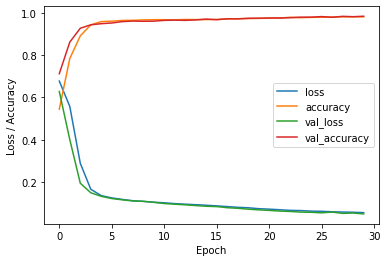

training: Accuracy = 0.9810, Sensitivity = 0.9840, Specificity = 0.9780 

validation: Accuracy = 0.9838, Sensitivity = 0.9833, Specificity = 0.9843 



In [44]:

# Now train the ex1
estimator_ex1 = ex1.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=1)


# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Get the training predictions and results for those
d_trn_pred = ex1.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex1.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')


### CellName: Ex2 (#7)
### CellType: Exercise
### Cell instruction: Instructions for question 3

You are now going to take a look into the CNN model. There are many attempts to visualize how the CNN model is making classifications. We will here just look at the different layer outputs given an input image. The function 'layerVisualization', found in cell #5 does the following:
* Use one selected image from the supplied dataset.
* Make a forward pass through the CNN remembering all intermediate values.
* Plot all of the "filters" for each of the layers.
* One can select to plot before or after the MaxPooling.

You pass the model that you want to visualize to the 'layerVisualization' function. If you do not change the names in cell (Ex1) it will be 'ex1'.

#### Question 3
Train a CNN for the "5" vs "6" problem! As a suggestion use the following CNN

*3x(3x3 kernel)-maxpool-3x(3x3 kernel)-maxpool-(Flatten)-Dense(5)-Dense(1)*

Make sure that your trained model gives good validation results (i.e. > 95% accuracy). Having such a model, you can run the cell below. There are two parameters you need to specify, *idx* and *post_pool*. The *post_pool* variable can be set to *True* meaning that filters will be shown after MaxPooling. The image to show is selected by the *idx* variable. As an example, the following values represent,
* idx=1 number "6"
* idx=2 numner "5"
* idx=3 another number "6"
* idx=5 antoher number "5"

**Can you find some property in the filters that makes sense when it comes to separating "5" from "6"?**

Hint! If you repeat the training you most likely get a new network and other filters!


In [329]:
# Load the dataset, MNIST-56
x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex1
ex3 = Sequential()

# First conv layer
ex3.add(Conv2D(3, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex3.add(Conv2D(3, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex3.add(Flatten())
ex3.add(Dense(5, activation='relu'))

# Output layer
ex3.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
ex3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# ex1.summary()


# Now train the ex1
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                        validation_data=(x_val, d_val),
                        epochs=30, 
                        batch_size=64,
                        verbose=0)


# Training history
# plt.figure()
# plt.ylabel('Loss / Accuracy')
# plt.xlabel('Epoch')
# for k in estimator_ex1.history.keys():
#     plt.plot(estimator_ex1.history[k], label = k) 
# plt.legend(loc='best')
# plt.show()

# Get the training predictions and results for those
d_trn_pred = ex3.predict(x_trn)[:,0]
sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')

# Get the validation predictions and the results for those
d_val_pred = ex3.predict(x_val)[:,0]
sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')


training: Accuracy = 0.9995, Sensitivity = 1.0000, Specificity = 0.9990 

validation: Accuracy = 0.9946, Sensitivity = 0.9916, Specificity = 0.9978 



In [330]:
def plot_filters(model):
    # Plots heatmaps of the filters in the model's convolutional layers
    filters, biases = [], []
    for layer in model.layers:
        if layer.__class__.__name__ == 'Conv2D':
            layer_filters, layer_biases = layer.get_weights()
            filters.append(layer_filters)
            biases.append(layer_biases)

    for i in range(len(filters)):
        max_value = filters[i].max()
        no_filters = filters[i].shape[-1]
        filter_depth = filters[i].shape[-2]
        fig, axs = plt.subplots(filter_depth, no_filters, sharex='all', sharey='all',figsize=(2*no_filters,2*filter_depth+1))
        fig.suptitle("Convlayer "+ str(i+1))
        for j in range(no_filters):
            if filter_depth>1:
                axs[0,j].set_title("Filter " + str(j+1) + "\nBias: {:0.5f}".format(biases[i][j]))
                for k in range(filter_depth):
                    im = axs[k,j].imshow(filters[i][:,:,k,j], cmap='bwr', interpolation='nearest', vmax = max_value, vmin = -max_value)
            else:
                im = axs[j].imshow(filters[i][:,:,0,j], cmap='bwr', interpolation='nearest', vmax = max_value, vmin = -max_value)
                axs[j].set_title("Filter " + str(j+1) + "\nBias: {:0.5f}".format(biases[i][j]))
        fig.subplots_adjust(bottom=0.1)
        ax_cbar = fig.add_axes([0, 0, 1, 0.05/filter_depth])
        plt.colorbar(im, cax=ax_cbar, orientation='horizontal')


[-0.0127672   0.06095717  0.20400572]
Prediction:  [1.5644915e-12]
Target    :  0.0
Prediction:  [2.968677e-10]
Target    :  0.0
Prediction:  [2.9584866e-09]
Target    :  0.0
Prediction:  [0.9996946]
Target    :  1.0
Prediction:  [1.7497054e-09]
Target    :  0.0


C:\Users\nilsb\AppData\Local\Temp/ipykernel_29656/3522431593.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18,12))


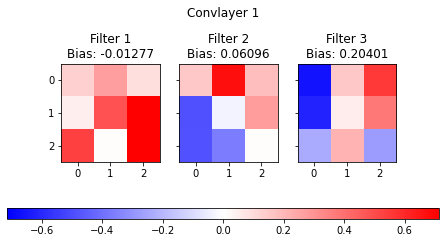

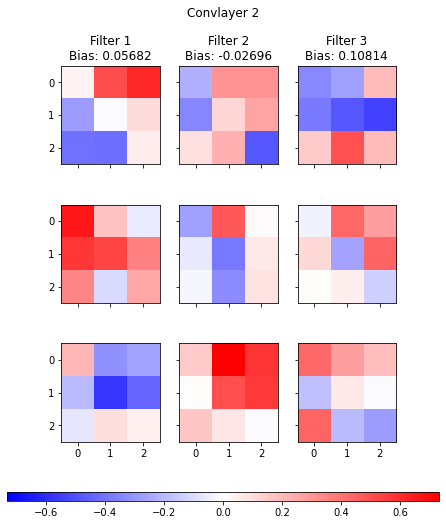

<Figure size 1296x864 with 0 Axes>

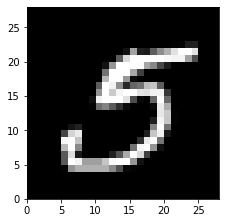

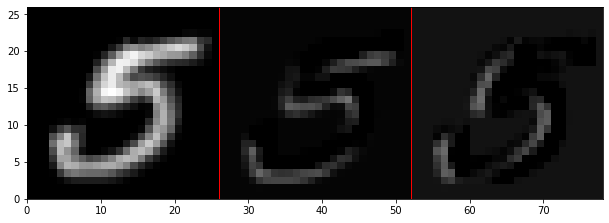

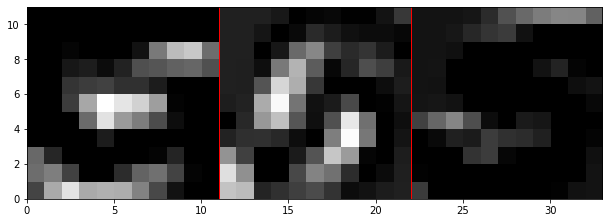

<Figure size 1296x864 with 0 Axes>

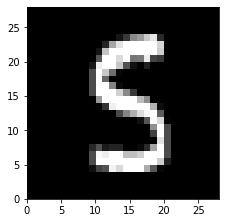

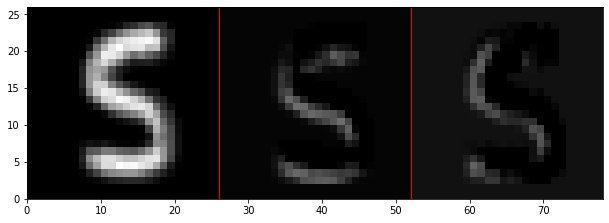

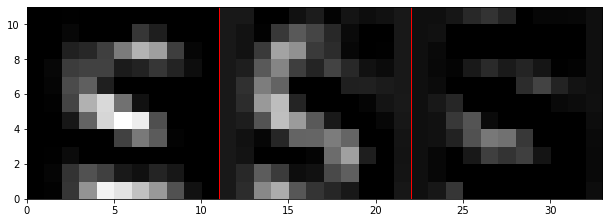

<Figure size 1296x864 with 0 Axes>

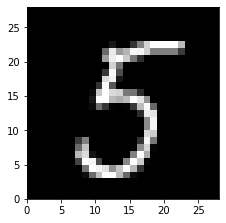

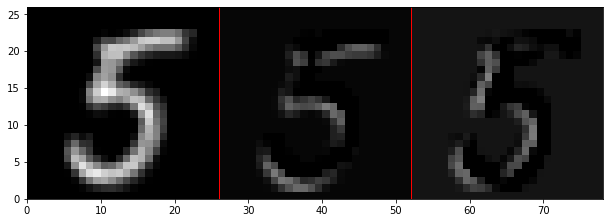

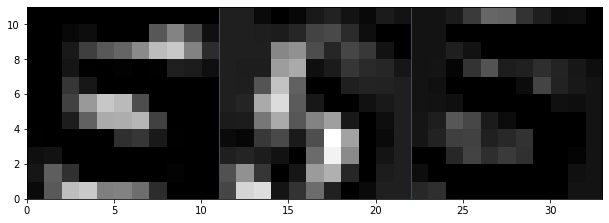

<Figure size 1296x864 with 0 Axes>

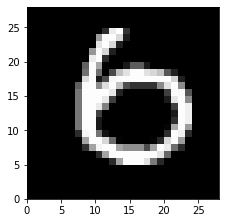

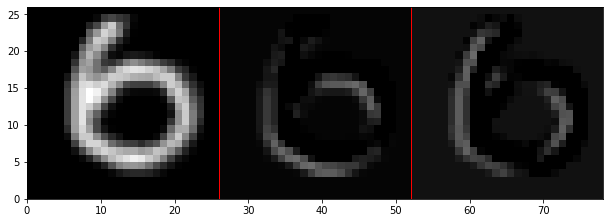

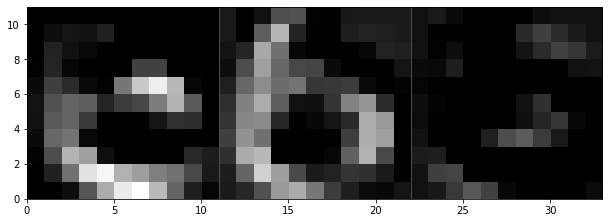

<Figure size 1296x864 with 0 Axes>

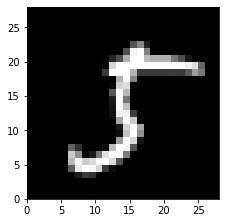

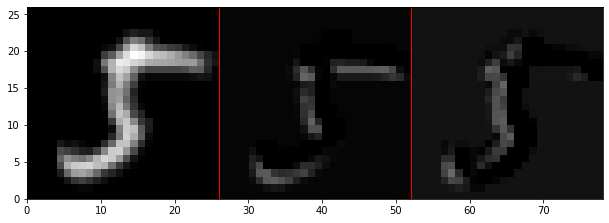

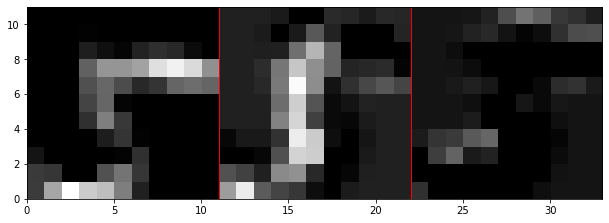

In [331]:
plot_filters(ex3)

# Show before or after MaxPooling
post_pool = False
# print(ex3.layers[0].get_weights())
a, b = ex3.layers[0].get_weights()
print(b)
# The test image to look at
# idx = 1

# Call the visualization method, giving the model and the validation data to select the case from
# layerVisaliztion(ex1, x_val, d_val, idx, post_pool)

for i in range(45,50):
    layerVisaliztion(ex3, x_val, d_val, i, post_pool)

### CellName: Ex3 (#8)
### CellType: Exercise
### Cell instruction: Instructions for question 4-5

## CNN for image classification

In this exercise you are going to train a CNN that can separate between circles/squares/triangles found in the CRT dataset, and the three different types of rectangles found in R3 dataset. We are going to use 500 training images and 1000 validation images. Code are provided for loading the data, training the model and presenting the result. Your task is to define the actual CNN model and see how it performs. For the following two questions you can optimize the model based on the validation performance. Here we assume that 1000 validation images is large enough such that "model selection overtraining bias" is small.

#### Question 4
Define your own CNN model for classifying the images in the CRT data into three classes. **Provide the details of your CNN model and present the validation result.**

**Hint:** Remember the difference between a binary classifier and a multi-class classifier!


#### Question 5
Define your own CNN model for classifying the images in the R3 data into three classes. **Provide the details of your CNN model and present the validation result.** **Why is this a more difficult problem?**


#### Bonus task 
The bonus tasks are provided if you have extra time and want to continue to explore the CNNs. **These tasks are not required for the course and does not influence any grading**. 

You can use the *layerVisualization* method also for above models (Q4 and Q5). It will show you the different filter outputs. Again try to understand the features the different filter learn to separate between circles-triangles-rectangles, or the rectangles for the R3 data set.

In [49]:
# Load the CRT dataset (Question 4)
# x_trn, d_trn, x_val, d_val, width, height = loadImagesCRT()

# Load the R3 dataset (Question 5)
x_trn, d_trn, x_val, d_val, width, height = loadImagesR3()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)


Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)


In [56]:

# Define the CNN ex3
ex3 = Sequential()

#
# YOUR CODE HERE
#


# ex3.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# ex3.add(MaxPooling2D(pool_size=(2, 2)))
# ex3.add(MaxPooling2D(pool_size=(3, 3)))

ex3.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(2, 2)))
# ex3.add(MaxPooling2D(pool_size=(3, 3)))

ex3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))
# ex3.add(MaxPooling2D(pool_size=(3, 3)))

ex3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))
# # ex3.add(MaxPooling2D(pool_size=(3, 3)))

# ex3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# ex3.add(MaxPooling2D(pool_size=(2, 2)))
# # ex3.add(MaxPooling2D(pool_size=(3, 3)))
# # ex3.add(Dropout(0.2))

# ex3.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# ex3.add(MaxPooling2D(pool_size=(2, 2)))

# full connections
ex3.add(Flatten())
ex3.add(Dense(10, activation='relu'))
ex3.add(Dropout(0.25))


# output
ex3.add(Dense(3, activation='softmax'))



# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.003)
ex3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3.summary()
# plot_model(ex3, show_shapes=True, show_layer_names=True)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 6, 6, 64)       

C:\Users\Nils\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


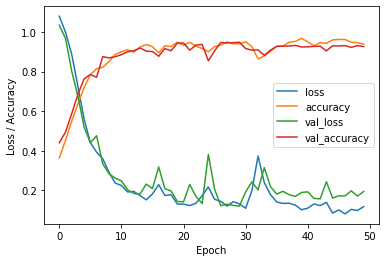

Training  log_loss:   0.005983478253068156
Training  accuracy:   1.0 



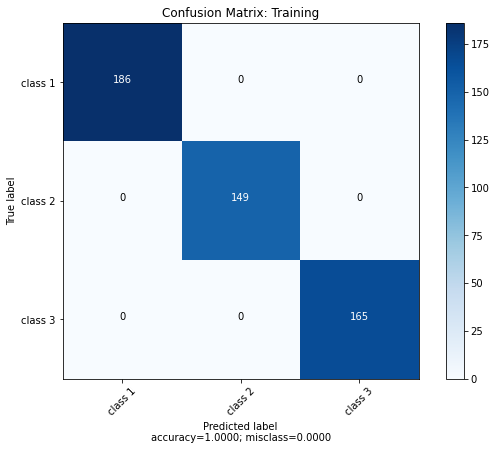

Validation  log_loss:   0.19394146381195856
Validation  accuracy:   0.926 



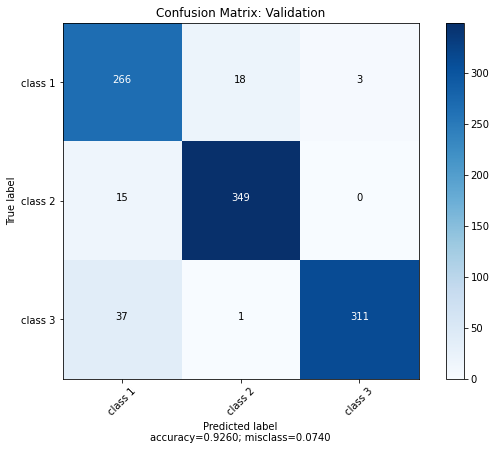

In [57]:

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')

### Visualization

Prediction:  [8.6413252e-01 9.3598916e-05 1.3577388e-01]
Target    :  [1. 0. 0.]
Prediction:  [1.6748928e-07 4.4173001e-19 9.9999988e-01]
Target    :  [0. 0. 1.]
Prediction:  [5.790262e-12 9.334729e-30 1.000000e+00]
Target    :  [0. 0. 1.]
Prediction:  [0.21858053 0.7130018  0.06841759]
Target    :  [0. 1. 0.]
Prediction:  [1.6472771e-09 5.5054560e-27 1.0000000e+00]
Target    :  [0. 0. 1.]


C:\Users\nilsb\AppData\Local\Temp/ipykernel_23020/3522431593.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18,12))


<Figure size 1296x864 with 0 Axes>

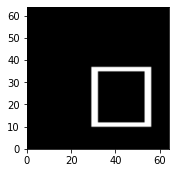

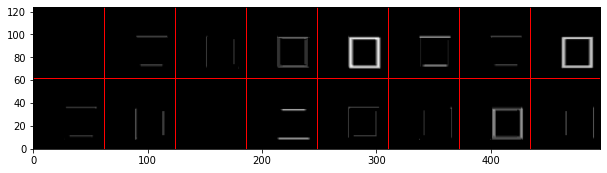

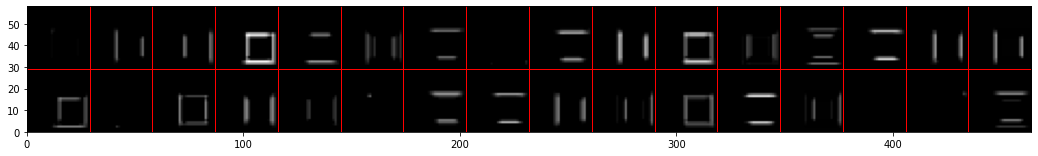

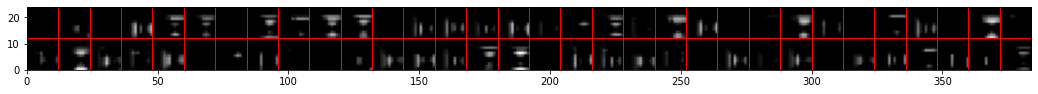

<Figure size 1296x864 with 0 Axes>

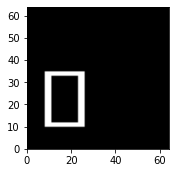

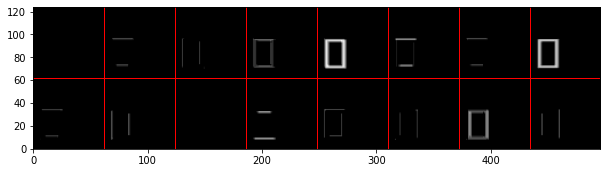

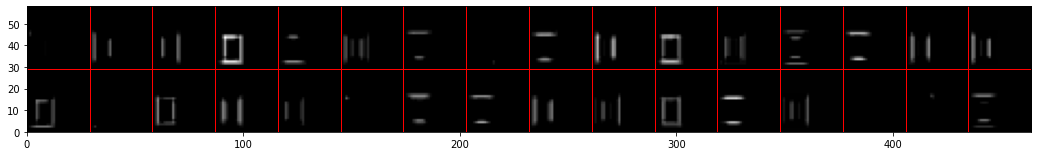

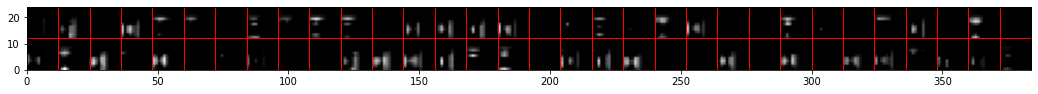

<Figure size 1296x864 with 0 Axes>

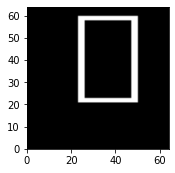

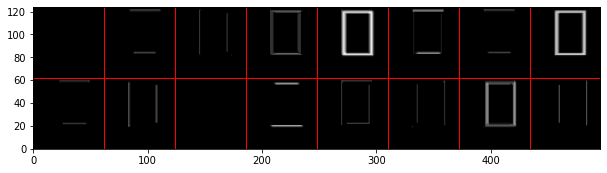

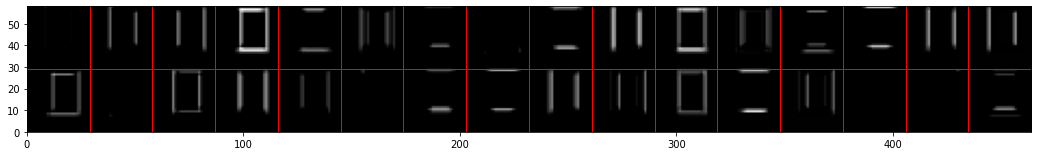

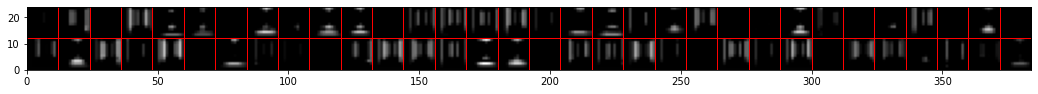

<Figure size 1296x864 with 0 Axes>

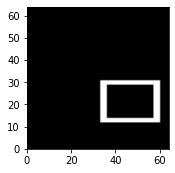

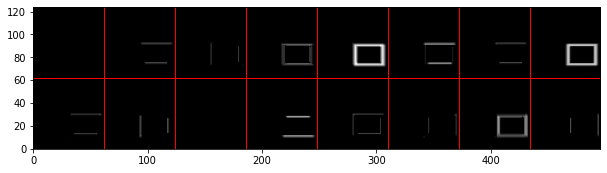

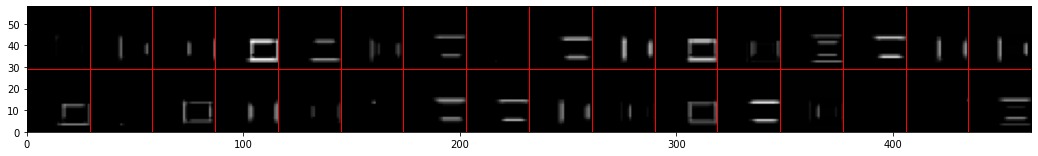

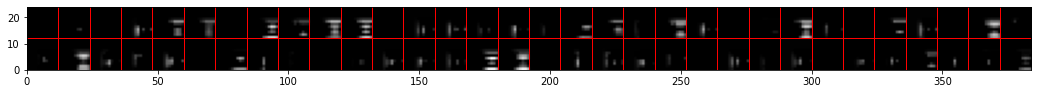

<Figure size 1296x864 with 0 Axes>

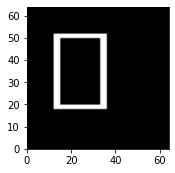

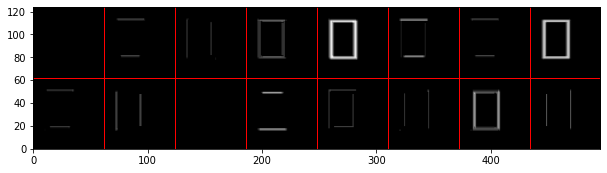

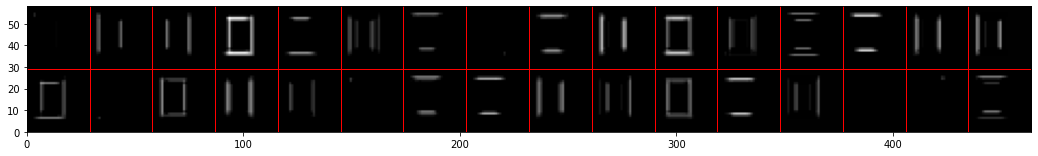

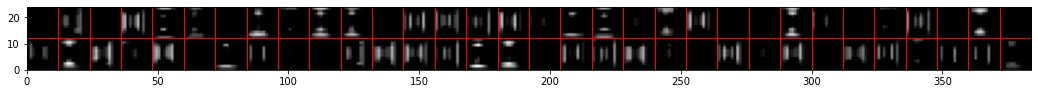

In [48]:
# plot_filters(ex3)
# print(ex3.layers[0].get_weights())
# a, b = ex3.layers[0].get_weights()
# print(b)

# Show before or after MaxPooling
post_pool = False
# The test image to look at
# idx = 1

# Call the visualization method, giving the model and the validation data to select the case from
# layerVisaliztion(ex1, x_val, d_val, idx, post_pool)

for i in range(45,50):
    layerVisaliztion(ex3, x_val, d_val, i, post_pool)

#### Playing around with parallell layers

In [23]:
inpt = Input(shape=(input_shape))

tower_11 = Conv2D(filters=16, kernel_size=(1, 2), padding='same', activation='relu')(inpt)
tower_11 = Conv2D(filters=16, kernel_size=(2, 1), padding='same', activation='relu')(tower_11)
tower_11 = MaxPooling2D(pool_size=(2, 2))(tower_11)

tower_12 = Conv2D(filters=16, kernel_size=(1, 3), padding='same', activation='relu')(inpt)
tower_12 = Conv2D(filters=16, kernel_size=(3, 1), padding='same', activation='relu')(tower_12)
tower_12 = MaxPooling2D(pool_size=(2,2))(tower_12)

tower_13 = Conv2D(filters=16, kernel_size=(1, 5), padding='same', activation='relu')(inpt)
tower_13 = Conv2D(filters=16, kernel_size=(5, 1), padding='same', activation='relu')(tower_13)
tower_13 = MaxPooling2D(pool_size=(2, 2))(tower_13)

merged_1 = keras.layers.concatenate([tower_11, tower_12, tower_13], axis=3)

tower_21 = Conv2D(filters=32, kernel_size=(1, 2), padding='same', activation='relu')(merged_1)
tower_21 = Conv2D(filters=32, kernel_size=(2, 1), padding='same', activation='relu')(tower_21)
tower_21 = MaxPooling2D(pool_size=(2, 2))(tower_21)

tower_22 = Conv2D(filters=32, kernel_size=(1, 3), padding='same', activation='relu')(merged_1)
tower_22 = Conv2D(filters=32, kernel_size=(3, 1), padding='same', activation='relu')(tower_22)
tower_22 = MaxPooling2D(pool_size=(2,2))(tower_22)

tower_23 = Conv2D(filters=32, kernel_size=(1, 5), padding='same', activation='relu')(merged_1)
tower_23 = Conv2D(filters=32, kernel_size=(5, 1), padding='same', activation='relu')(tower_23)
tower_23 = MaxPooling2D(pool_size=(2, 2))(tower_23)

merged_2 = keras.layers.concatenate([tower_21, tower_22, tower_23], axis=3)

flat_1 = Flatten()(merged_2)

dropped = Dropout(0.25)(flat_1)
mlp = Dense(10, activation='relu')(dropped)

out = Dense(3, activation='softmax')(mlp)

ex3v2 = Model(inpt, out)

adam = Adam(lr=0.003)
ex3v2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3v2.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_194 (Conv2D)            (None, 28, 28, 16)   48          ['input_17[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 28, 28, 16)   64          ['input_17[0][0]']               
                                                                                                  
 conv2d_198 (Conv2D)            (None, 28, 28, 16)   96          ['input_17[0][0]']               
                                                                                           

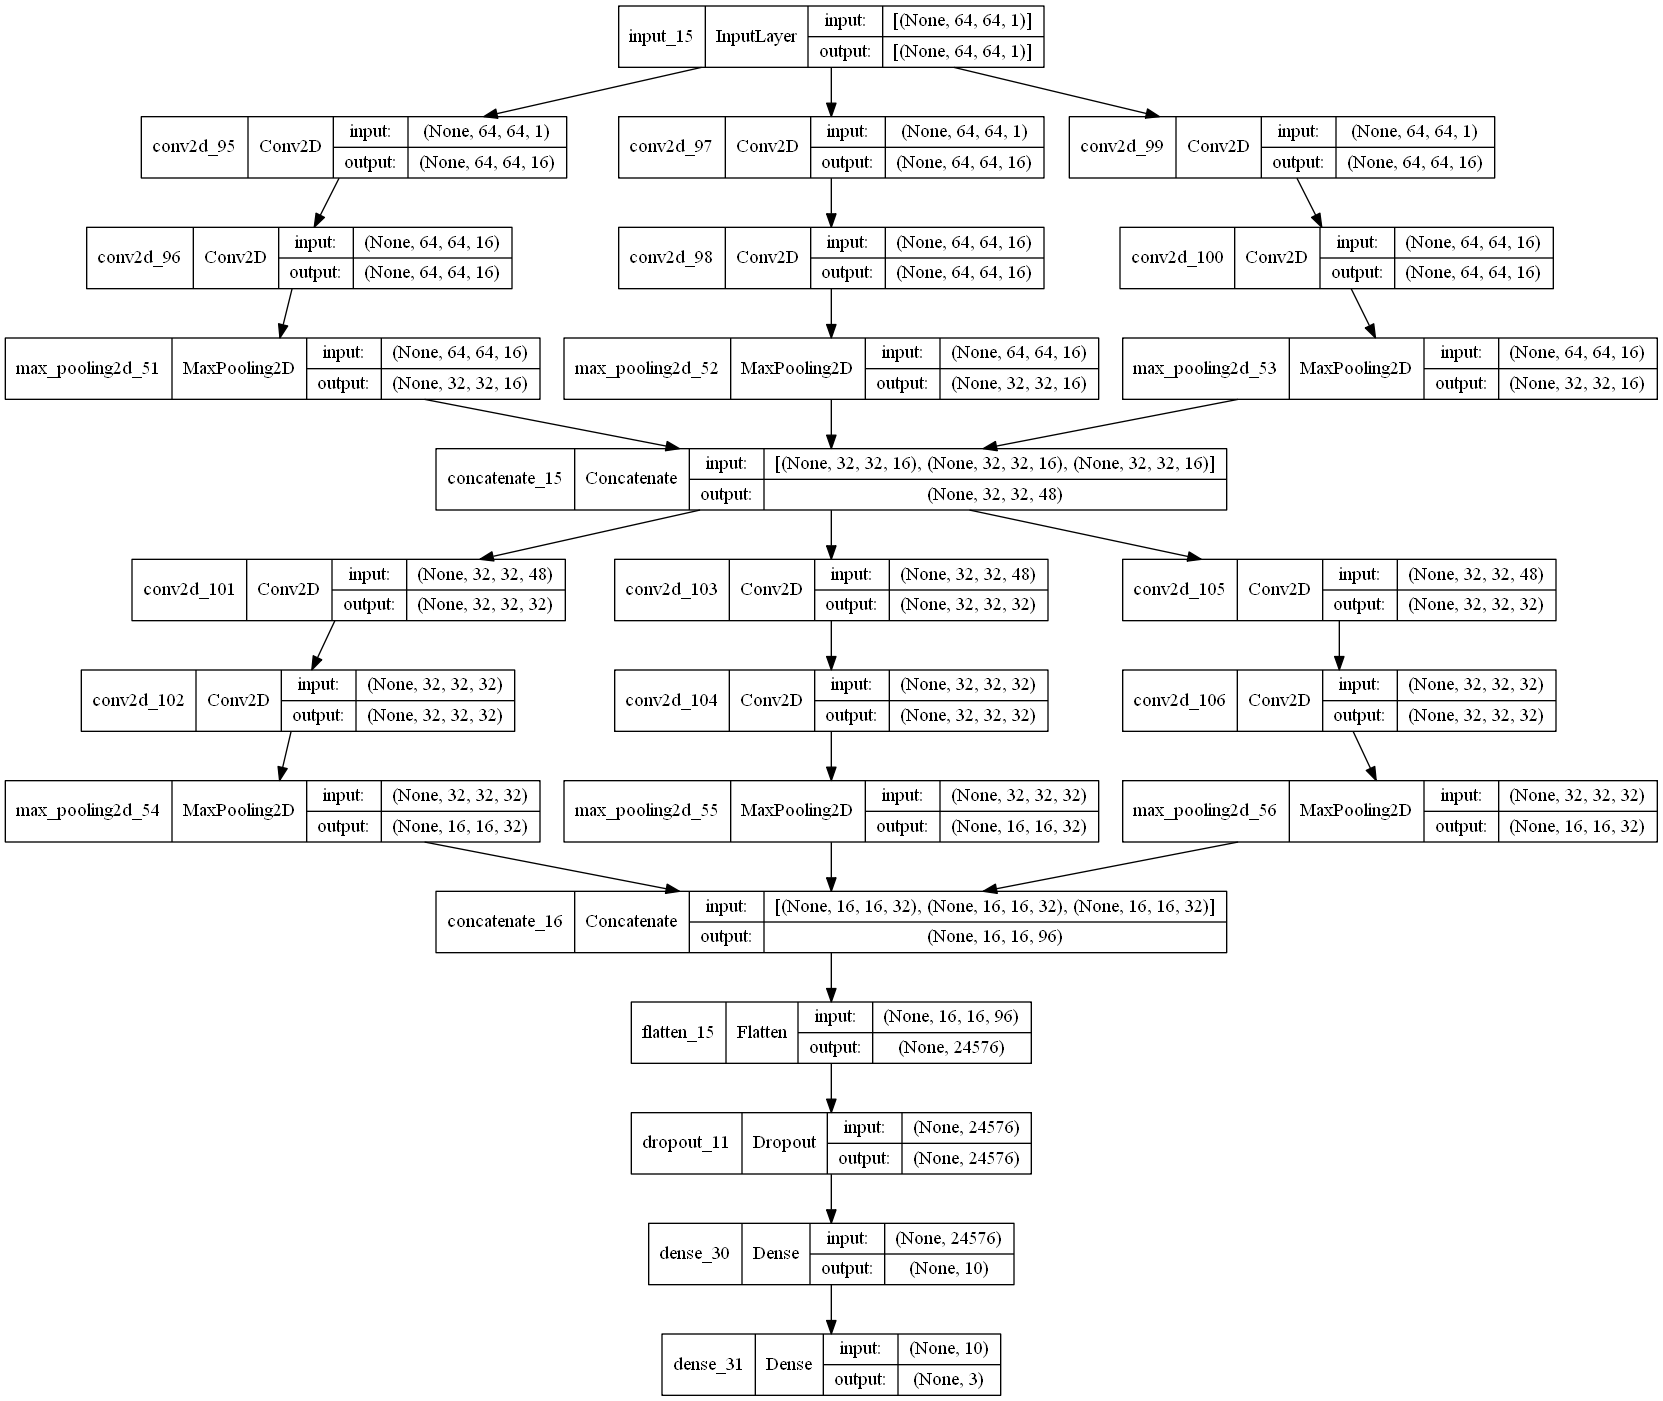

In [44]:
plot_model(ex3v2, show_shapes=True, show_layer_names=True)

Epoch 1/50
10/10 [==============================] - 3s 149ms/step - loss: 1.1133 - accuracy: 0.3860 - val_loss: 1.1008 - val_accuracy: 0.3190
Epoch 2/50
10/10 [==============================] - 1s 122ms/step - loss: 1.0643 - accuracy: 0.4520 - val_loss: 1.0834 - val_accuracy: 0.3940
Epoch 3/50
10/10 [==============================] - 1s 123ms/step - loss: 0.9609 - accuracy: 0.5260 - val_loss: 1.0460 - val_accuracy: 0.4510
Epoch 4/50
10/10 [==============================] - 1s 122ms/step - loss: 0.8112 - accuracy: 0.6240 - val_loss: 1.0132 - val_accuracy: 0.5180
Epoch 5/50
10/10 [==============================] - 1s 123ms/step - loss: 0.6298 - accuracy: 0.7120 - val_loss: 0.9890 - val_accuracy: 0.5680
Epoch 6/50
10/10 [==============================] - 1s 123ms/step - loss: 0.4398 - accuracy: 0.8220 - val_loss: 1.0916 - val_accuracy: 0.5930
Epoch 7/50
10/10 [==============================] - 1s 122ms/step - loss: 0.2931 - accuracy: 0.8820 - val_loss: 1.1156 - val_accuracy: 0.6000
Epoch 

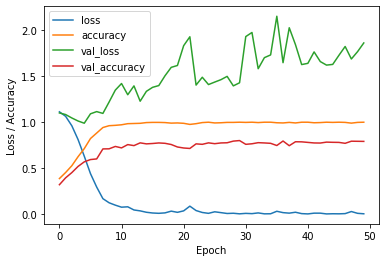

Training  log_loss:   0.0005693294818228054
Training  accuracy:   1.0 



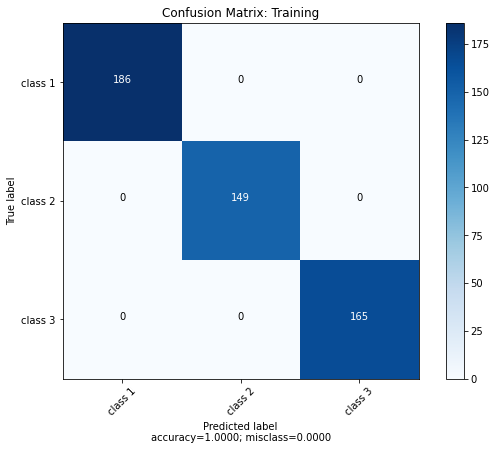

Validation  log_loss:   1.8636468252446377
Validation  accuracy:   0.791 



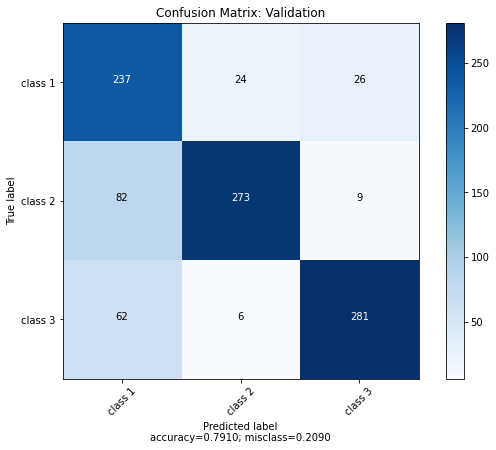

In [45]:

# Now train the ex3
estimator_ex3v2 = ex3v2.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3v2, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3v2, x_val, d_val, 'Validation')

### CellName: Ex4-1 (#9)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
We will now look at recurrent networks! This exercise is using divided into three cells below. We start by loading and visualizing the data. **Note!** The actual questions for this part can be found in cell *Ex4-3* below.

### Loading and visualizing the data
The cell below loads the training data and the validation data from existing binary python files and plots one set of training/validation data, both the input sequence and the target sequence. Run the cell by entering into the cell and press "CTRL Enter".

How is data generated? The input sequence consists of square pulses with varying length and height. The waiting time between the pulses is also varying within some predefined ranges. The lower limit is 2 times the length of the previous pulse. The target triangle pulse sequence is built from the input sequence as follows:
* the triangle pulse start when the input square pulse have ended.
* the width of the triangle (at the base) is twice the width of the square pulse.
* the height of the triangle is the same as the height of the square pulse.

The task is now to learn this mapping using a recurrent neural network. There are 500 input/target sequences in the training data and 500 in the test data.


Training data input shape:  (500, 100)
Training data output shape:  (500, 100)
Validation data input shape:  (500, 100)
Validation data output shape:  (500, 100)


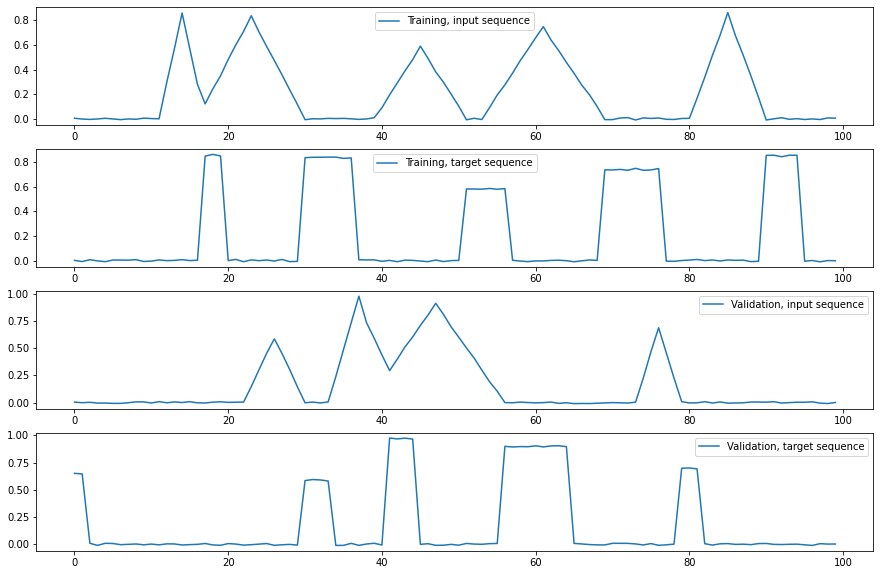

In [214]:
# Load data from files
x_trn,d_trn= np.load("pulsedata1-trn.npy")
x_val,d_val = np.load("pulsedata1-val.npy")
#x_trn,d_val= np.load("pulsedata2-trn.npy")
#x_val,d_val = np.load("pulsedata2-val.npy")

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# If this is set to True, then we have the reverse problem. Input triangle pulse, target square puls.
if True:
    d_trn,x_trn = x_trn[:,::-1],d_trn[:,::-1]
    d_val,x_val = x_val[:,::-1],d_val[:,::-1]

ns,tlen = x_trn.shape
t = np.arange(tlen)

# The training / test case to look at
i = 3

# Plot
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(t,x_trn[i,:])
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,d_trn[i,:])
plt.legend(['Training, target sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,x_val[i,:])
plt.legend(['Validation, input sequence'], loc=0)

plt.subplot(4,1,4)
plt.plot(t,d_val[i,:])
plt.legend(['Validation, target sequence'], loc=0)


### CellName: Ex4-2 (#10)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### define the model and train
Here we are going to setup the model and train it. There are three different models to choose from: 
* SimpleRNN: Simple feedback weights where the output from a node is feeding back to itself. For several hidden nodes there are feedback weights to all other nodes in the layer.
* LSTM: The LSTM unit
* GRU: The GRU unit

The standard choice of activation function is *tanh*, but you can also test *relu*. When it comes to training this model we are goint to use a possible truncated BPTT approach. The support in Keras for doing this is somewhat limited so here it is implemented manually. In short we have 500 training sequences and we define a mini-batch size *mb* that selects *mb* of these sequences to train using the normal stochastic gradient descent idea. Then we have a variable *batchlen* that is the length of the sequence to use in truncated BPTT. The default values for these are *mb=10* and *batchlen=50*. If you want to train without the truncated BPTT approach put *batchlen=100*.

During training we print the normalized training and validation error. Normalized means here that the loss (=MSE) is divided by the variance of the target signal. So that a normalized error of 1 is not so good, but if we get below 0.1 (or so) it means that the error is much smaller than the signal itself.

What you need to do in this cell is to define your model and train it.

## ------ Question 6 ------

### Ex 6 Simple RNN

#### Define Model

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (10, 50, 5)               35        
                                                                 
 time_distributed_34 (TimeDi  (10, 50, 1)              6         
 stributed)                                                      
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Wall time: 426 ms


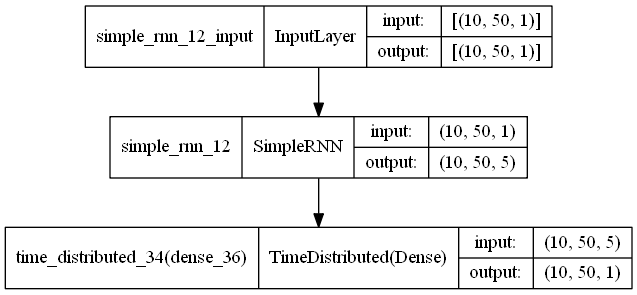

In [50]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
net = SimpleRNN
# net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 5
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

rnn_model_6 = Sequential()
rnn_model_6.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
# rnn_model_6.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

rnn_model_6.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
rnn_model_6.compile(optimizer=adam,loss='mean_squared_error')
rnn_model_6.summary()
plot_model(rnn_model_6, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

#### Training

In [52]:
%%time 
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_6.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_6.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_6.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_6.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


Epoch Time/Epoch  Trn-Err     Val-Err
1     27.19        1.77998     0.95469
2     23.31        0.86928     0.77958
3     24.99        0.67252     0.60675
4     24.86        0.58868     0.55611
5     24.58        0.56145     0.54011
6     23.51        0.54837     0.52922
7     24.74        0.53891     0.52104
8     26.08        0.53156     0.51457
9     24.55        0.52566     0.50932
10     25.46        0.52082     0.50500
11     25.64        0.51681     0.50138
12     24.14        0.51342     0.49828
13     23.08        0.51051     0.49559
14     23.61        0.50797     0.49321
15     24.72        0.50573     0.49108
16     24.38        0.50374     0.48917
17     25.31        0.50197     0.48743
18     25.36        0.50038     0.48586
19     25.13        0.49896     0.48441
20     26.15        0.49769     0.48307
Wall time: 8min 16s


In [45]:
# Now the training part (FIRST RUN, two times)
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_6.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_6.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_6.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_6.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


Epoch Time/Epoch  Trn-Err     Val-Err
1     25.02        0.46457     0.44833
2     23.40        0.46259     0.44593
3     23.89        0.46054     0.44340
4     24.45        0.45838     0.44071
5     26.98        0.45605     0.43782
6     26.14        0.45347     0.43469
7     22.99        0.45058     0.43126
8     24.42        0.44725     0.42746
9     23.65        0.44334     0.42312
10     24.89        0.43866     0.41800
11     25.84        0.43296     0.41173
12     24.41        0.42590     0.40399
13     24.09        0.41707     0.39494
14     26.62        0.40591     0.38420
15     23.65        0.39144     0.36665
16     25.43        0.37308     0.34442
17     25.51        0.35085     0.32233
18     24.59        0.32548     0.30839
19     22.69        0.29841     0.29989
20     24.40        0.27392     0.27422


## ------ Question 7 ------

### Q7 Simple RNN

#### Define Model

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (10, 50, 12)              168       
                                                                 
 time_distributed_35 (TimeDi  (10, 50, 1)              13        
 stributed)                                                      
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Wall time: 410 ms


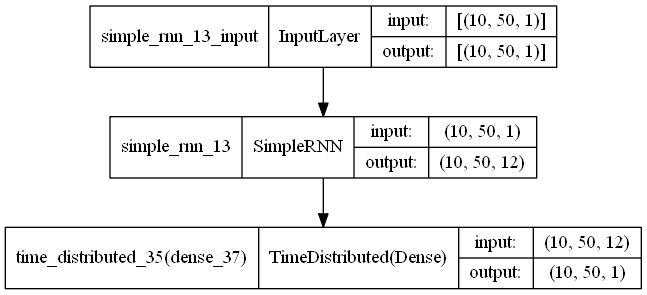

In [53]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
net = SimpleRNN
# net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 12
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

rnn_model = Sequential()
rnn_model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
# rnn_model.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

rnn_model.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
rnn_model.compile(optimizer=adam,loss='mean_squared_error')
rnn_model.summary()
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

#### Training

In [54]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))

send_notification("Q7 sRNN finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     26.90        0.98158     0.57619
2     23.26        0.56819     0.51462
3     22.37        0.48627     0.39972
4     22.71        0.38788     0.33950
5     22.69        0.33730     0.31614
6     22.85        0.29118     0.25280
7     23.04        0.26126     0.23439
8     22.73        0.23830     0.22040
9     22.37        0.21740     0.20910
10     22.68        0.20004     0.19498
11     22.52        0.18520     0.17973
12     23.24        0.17239     0.16597
13     22.68        0.16132     0.15330
14     22.59        0.15164     0.14204
15     22.68        0.14317     0.13159
16     22.91        0.13593     0.12228
17     22.55        0.12936     0.11608
18     23.37        0.12344     0.11163
19     22.53        0.11886     0.10633
20     22.72        0.11554     0.10168


### Q7 GRU

#### Define Model

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (10, 50, 6)               162       
                                                                 
 time_distributed_36 (TimeDi  (10, 50, 1)              7         
 stributed)                                                      
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Wall time: 714 ms


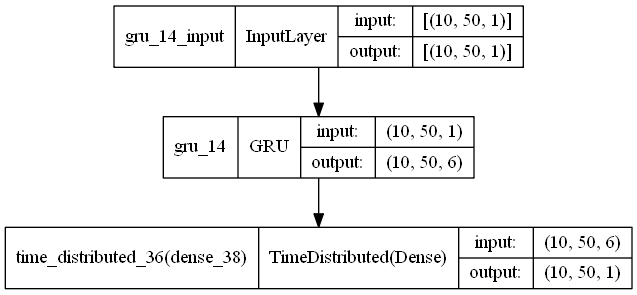

In [55]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
# net = SimpleRNN
net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 6
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

gru_model = Sequential()
gru_model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
# model.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

gru_model.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
gru_model.compile(optimizer=adam,loss='mean_squared_error')
gru_model.summary()
plot_model(gru_model, to_file='gru_model.png', show_shapes=True, show_layer_names=True)


#### Training

In [56]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))

send_notification("Q7 GRU finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     12.72        0.81106     0.54472
2     9.16        0.46262     0.38590
3     9.32        0.34345     0.27595
4     8.96        0.24515     0.19409
5     9.24        0.16770     0.13288
6     9.35        0.11884     0.10793
7     9.04        0.09528     0.09088
8     9.20        0.08329     0.08032
9     9.46        0.07571     0.07284
10     9.15        0.06966     0.06685
11     9.04        0.06438     0.06180
12     9.21        0.05966     0.05742
13     9.36        0.05542     0.05352
14     9.05        0.05160     0.05003
15     9.25        0.04818     0.04692
16     9.44        0.04513     0.04418
17     9.10        0.04243     0.04181
18     8.99        0.04004     0.03978
19     9.22        0.03792     0.03809
20     9.04        0.03603     0.03665


### Q7 LSTM

##### Define Model

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (10, 50, 6)               192       
                                                                 
 time_distributed_37 (TimeDi  (10, 50, 1)              7         
 stributed)                                                      
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
Wall time: 667 ms


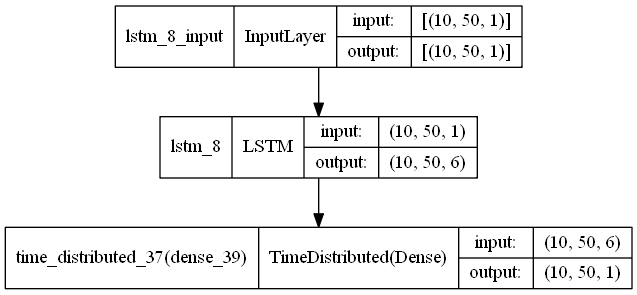

In [57]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
# net = SimpleRNN
#net = GRU
net = LSTM

# Number of hidden nodes
nh1 = 6
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

lstm_model = Sequential()
lstm_model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
# model.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

lstm_model.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
lstm_model.compile(optimizer=adam,loss='mean_squared_error')
lstm_model.summary()
plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

##### Training

In [58]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        lstm_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = lstm_model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        lstm_model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = lstm_model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))

send_notification("Q7 LSTM finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     12.29        0.94308     0.60928
2     9.26        0.49989     0.42601
3     9.21        0.39883     0.33127
4     9.65        0.28366     0.23616
5     10.23        0.21992     0.19041
6     11.36        0.16445     0.14052
7     10.21        0.12861     0.11903
8     10.67        0.10651     0.10098
9     10.03        0.09143     0.08972
10     10.07        0.08051     0.08198
11     10.23        0.07187     0.07580
12     10.21        0.06440     0.07012
13     10.16        0.05761     0.06471
14     10.09        0.05146     0.05952
15     10.37        0.04611     0.05459
16     10.06        0.04164     0.04998
17     10.15        0.03799     0.04561
18     10.14        0.03491     0.04140
19     10.11        0.03223     0.03736
20     10.25        0.02987     0.03362


## ------ Question 8 ------

### Q8 GRU

#### Define Model

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (10, 50, 3)               54        
                                                                 
 time_distributed_38 (TimeDi  (10, 50, 1)              4         
 stributed)                                                      
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
Wall time: 684 ms


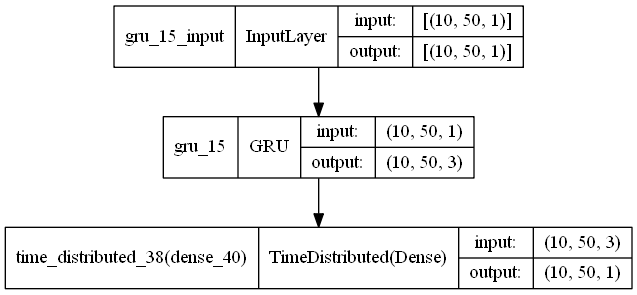

In [59]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
# net = SimpleRNN
net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 3
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

gru_model_8 = Sequential()
gru_model_8.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
# model.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

gru_model_8.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
gru_model_8.compile(optimizer=adam,loss='mean_squared_error')
gru_model_8.summary()
plot_model(gru_model_8, to_file='gru_model.png', show_shapes=True, show_layer_names=True)


#### Training

In [60]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model_8.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model_8.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model_8.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model_8.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


send_notification("Q8 GRU finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     12.94        0.93168     0.77936
2     9.88        0.62258     0.51893
3     10.20        0.49079     0.43011
4     10.29        0.38150     0.30264
5     10.12        0.25821     0.19764
6     9.88        0.16882     0.14362
7     10.31        0.12618     0.10667
8     10.00        0.10930     0.09344
9     9.86        0.10049     0.08681
10     10.01        0.09453     0.08227
11     10.01        0.08979     0.07901
12     9.96        0.08573     0.07660
13     10.01        0.08214     0.07462
14     10.53        0.07892     0.07278
15     10.62        0.07606     0.07096
16     11.05        0.07350     0.06916
17     10.32        0.07116     0.06737
18     10.04        0.06900     0.06558
19     10.73        0.06695     0.06380
20     9.68        0.06500     0.06202


## ------ Question 9 ------

### Q9 sRNN

#### Define Model

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (10, 50, 10)              120       
                                                                 
 simple_rnn_25 (SimpleRNN)   (10, 50, 20)              620       
                                                                 
 time_distributed_62 (TimeDi  (10, 50, 1)              21        
 stributed)                                                      
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________
Wall time: 502 ms


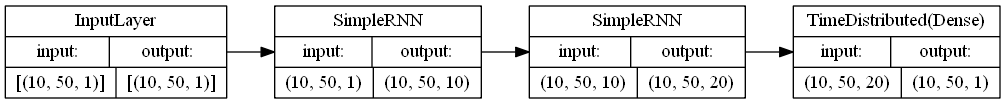

In [225]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
net = SimpleRNN
# net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 10
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 20

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 30

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

rnn_model_9 = Sequential()
rnn_model_9.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
rnn_model_9.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

rnn_model_9.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
rnn_model_9.compile(optimizer=adam,loss='mean_squared_error')
rnn_model_9.summary()
plot_model(rnn_model_9, to_file='media/q9_rnn_model.png', 
            show_shapes=True, 
            show_layer_names=False,
            rankdir="LR")



#### Training

In [227]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

ttot = 0
print('Epoch', 'Time/Epoch', ' Tot Time', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_9.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        rnn_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = rnn_model_9.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ttot += t1-t0
    ndone += 1
    print(ndone, "    {:.2f}       {:.2f}     {:.5f}     {:.5f}".format(t1-t0, ttot, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


send_notification("Q9 RNN finished training")

Epoch Time/Epoch  Tot Time  Trn-Err     Val-Err
1     29.66       29.66     0.38842     0.32872
2     26.50       56.16     0.30951     0.30824
3     23.64       79.81     0.28940     0.26009
4     25.23       105.03     0.25275     0.25102
5     23.07       128.10     0.24366     0.22170
6     22.77       150.88     0.22250     0.19957
7     25.26       176.14     0.20671     0.20623
8     29.37       205.51     0.19919     0.18058
9     27.62       233.13     0.18449     0.18481
10     25.66       258.79     0.17366     0.17219
11     45.99       304.78     0.16862     0.15619
12     50.84       355.62     0.16672     0.16785
13     92.60       448.22     0.16434     0.18139
14     104.18       552.40     0.16025     0.14030
15     76.67       629.07     0.15124     0.16110
16     79.85       708.91     0.15582     0.13731
17     79.34       788.25     0.14851     0.13638
18     77.82       866.07     0.14533     0.12812
19     86.05       952.12     0.13802     0.13340
20     66.77 

In [228]:
1018.90/60, 1018.90%60

(16.981666666666666, 58.89999999999998)

### Q9 GRU

#### Define Model

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_42 (GRU)                (10, 50, 5)               120       
                                                                 
 gru_43 (GRU)                (10, 50, 10)              510       
                                                                 
 time_distributed_56 (TimeDi  (10, 50, 1)              11        
 stributed)                                                      
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Wall time: 993 ms


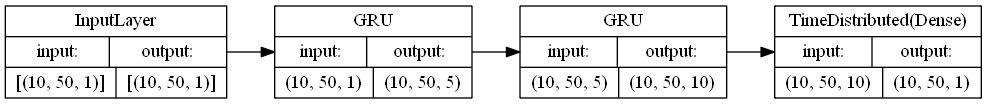

In [136]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
# net = SimpleRNN
net = GRU
# net = LSTM

# Number of hidden nodes
nh1 = 5
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 30

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

gru_model_9 = Sequential()
gru_model_9.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
gru_model_9.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

gru_model_9.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
gru_model_9.compile(optimizer=adam,loss='mean_squared_error')
gru_model_9.summary()
plot_model(gru_model_9, to_file='media/q9_gru_model.png', 
            show_shapes=True, 
            show_layer_names=False,
            rankdir="LR")



#### Training

In [137]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model_9.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        gru_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = gru_model_9.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


send_notification("Q9 GRU finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     20.09        0.79953     0.61266
2     12.63        0.52256     0.39467
3     12.84        0.36265     0.30642
4     12.11        0.28721     0.24289
5     12.63        0.23871     0.21594
6     12.67        0.21691     0.19954
7     12.11        0.20376     0.19251
8     12.04        0.19438     0.18522
9     12.74        0.18623     0.17763
10     11.97        0.17851     0.16951
11     11.41        0.16947     0.15904
12     12.68        0.15758     0.14708
13     13.52        0.14733     0.13927
14     12.24        0.13917     0.13141
15     12.16        0.13048     0.12372
16     12.10        0.12164     0.11700
17     12.04        0.11402     0.11091
18     11.69        0.10836     0.10584
19     11.70        0.10409     0.10136
20     11.74        0.10045     0.09679
21     11.65        0.09700     0.09232
22     12.37        0.09376     0.08917
23     12.20        0.09105     0.08735
24     12.33        0.08891     0.08595
25     11.7

### Q9 LSTM

#### Define Model

C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (10, 50, 5)               140       
                                                                 
 lstm_14 (LSTM)              (10, 50, 10)              640       
                                                                 
 time_distributed_41 (TimeDi  (10, 50, 1)              11        
 stributed)                                                      
                                                                 
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________
Wall time: 1.51 s


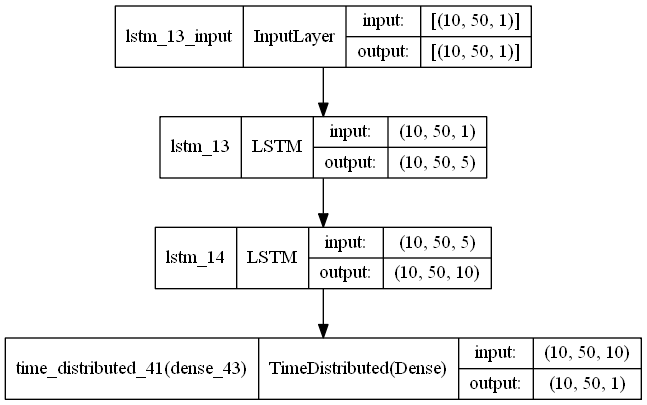

In [120]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 10
batchlen = 50

# The network type
# net = SimpleRNN
# net = GRU
net = LSTM

# Number of hidden nodes
nh1 = 5
# This is only if you would like to add an additional hidden layer. See below.
nh2 = 10

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 30

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

lstm_model_9 = Sequential()
lstm_model_9.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer
lstm_model_9.add(net(nh2, stateful=True, return_sequences=True, activation=activation))

lstm_model_9.add(TimeDistributed(Dense(1)))

adam = Adam(lr=0.003)
lstm_model_9.compile(optimizer=adam,loss='mean_squared_error')
lstm_model_9.summary()
plot_model(lstm_model_9, to_file='media/q9_lstm_model.png', 
            show_shapes=True, 
            show_layer_names=True,
            rankdir="TB",
            expand_nested=False, 
            show_layer_activations=True)


#### Training

In [121]:
%%time
# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        lstm_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = lstm_model_9.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        lstm_model_9.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = lstm_model_9.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))


send_notification("Q9 LSTM finished training")

Epoch Time/Epoch  Trn-Err     Val-Err
1     20.67        0.83463     0.66261
2     12.82        0.52472     0.42417
3     12.71        0.41221     0.37074
4     12.94        0.36711     0.32877
5     13.39        0.32076     0.28320
6     13.14        0.27456     0.24545
7     12.84        0.24659     0.22300
8     12.78        0.22731     0.20871
9     12.76        0.21334     0.19692
10     13.07        0.20149     0.18567
11     13.72        0.19044     0.17460
12     12.02        0.17984     0.16377
13     16.87        0.16979     0.15353
14     14.44        0.16033     0.14388
15     11.81        0.15116     0.13446
16     13.67        0.14211     0.12588
17     11.95        0.13381     0.11865
18     14.09        0.12636     0.11266
19     15.33        0.11981     0.10728
20     13.93        0.11441     0.10250
21     12.90        0.10975     0.09865
22     12.15        0.10594     0.09563
23     12.62        0.10277     0.09321
24     12.27        0.10009     0.09110
25     12.1

### CellName: Ex4-3 (#11)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Plot the result
In this cell we just plot the result for one of the first *mb* (minibatch size) test sequences. You can select which of these ones by an index (see the code). Also, the last graph shows the hidden node activation for all of the hidden nodes. **Note:** For the GRU and simpleRNN models this all of the hidden activity there is, but for the LSTM there is also the memory signal. This one is not shown!

### Questions
We are now finally at the point of asking questions. Whenever you define a new model and train it, you need to run the  cell below in order to show the result for the newly trained model. 

**Hint!** For all of the questions below you are going to train different models. Keep an eye on how the training error is developing. If you see large fluctuations, you may to change the learning rate. The default value of 0.003 should be OK for most trainings. 

#### Question 6
(Just to get started!) Define a simpleRNN model with 5 hidden nodes and train it for about 20 epochs. **What validation error do you obtain?** 

Hint: The validation error can be found during "training" as the error for the last epoch.
Hint: You may have to train a couple of times to make sure that you did not end up in a "bad" local minima the first time.

#### Question 7
Test different models! Train the three different models (one hidden layer only) with the approximately the same number of trainable weights (around 150-200) and decide which of them that works best? **So, out of the three different models, *simpleRNN, GRU och LSTM*, which one worked best using the same number weights?**

#### Question 8
Interpretation! You are now going to interpret the hidden node outputs. Remember that the actual output for each time is a linear combination of the hidden node outputs. As said before you can see the hidden nodes output in the last plot. Note that the weights in the dense layer can have different signs so that hidden nodes outputs can be linearly combined with both positive and negatives signs. Train a *GRU* model with 3 hidden nodes for about 20 epochs. **Try to explain what the different hidden nodes are detecting**.

Comment: This is of course a question with no definite true answer. We just want you to interpret what the different nodes are doing.

#### Question 9
If you look at the top of cell *Ex4-1* you can, by changing False -> True, define the reverse problem (see top of the code cell). That is, input is the triangle pulse and target is the square pulse. This should be a more difficult problem! **Why?** **Present a RNN model that can "solve" this reverse problem (i.e. below 0.1 in test error).**

Hint: Here you can experiment with two hidden layers of LSTM/GRU/SimpleRNN nodes

#### Bonus question
The bonus tasks are provided if you have extra time. **These tasks are not required for the course and does not influence any grading**.

In cell #9 where you load the data for the pulse converter problem you can change the name of the file to read: *pulsedata1-trn.npy* -> *pulsedata2-trn.npy* and *pulsedata1-val.npy* -> *pulsedata2-val.npy*. This will load a more difficult pulse converter problem. The input sequence is almost the same, but the rule for making the target sequence is different. Instead of using the same height of the triangle pulse as the square pulse, the height now depends on all **previous** square pulse heights. The dependence is a weighted average of all previous heights, where the most recent ones have a larger weights (exponential decay of weights). The task for this bonus question is simply to train a model that can *accurately* do the conversion. For this problem there sequences are of length 500, but only 200 sequences for training.


Output weights
Node 1: 0.69492894
Node 2: -0.08429685
Node 3: 0.42935938
Node 4: 0.34195393
Node 5: -0.6732677
Node 6: -0.708153
Node 7: -0.101907425
Node 8: 0.45759466
Node 9: -0.580615
Node 10: -0.14751159
Bias: 0.021426773


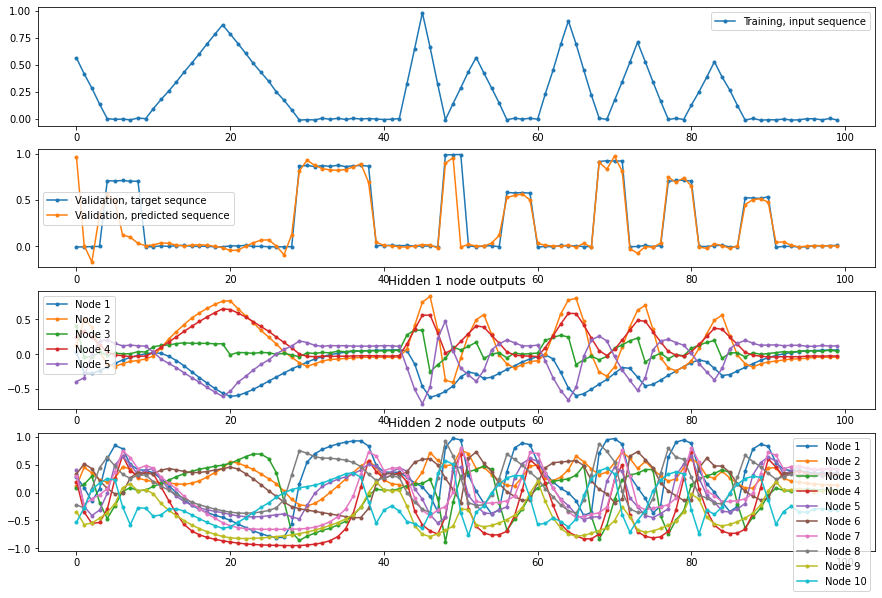

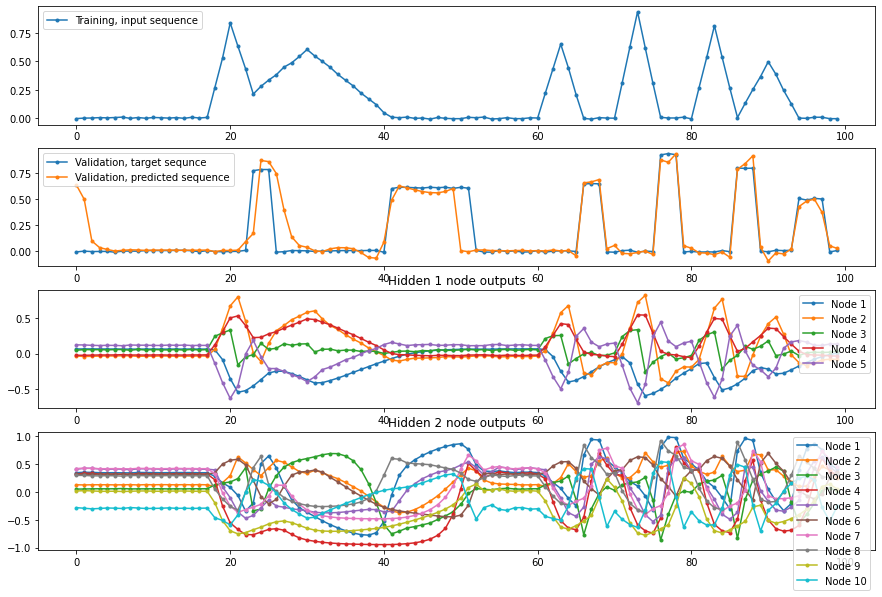

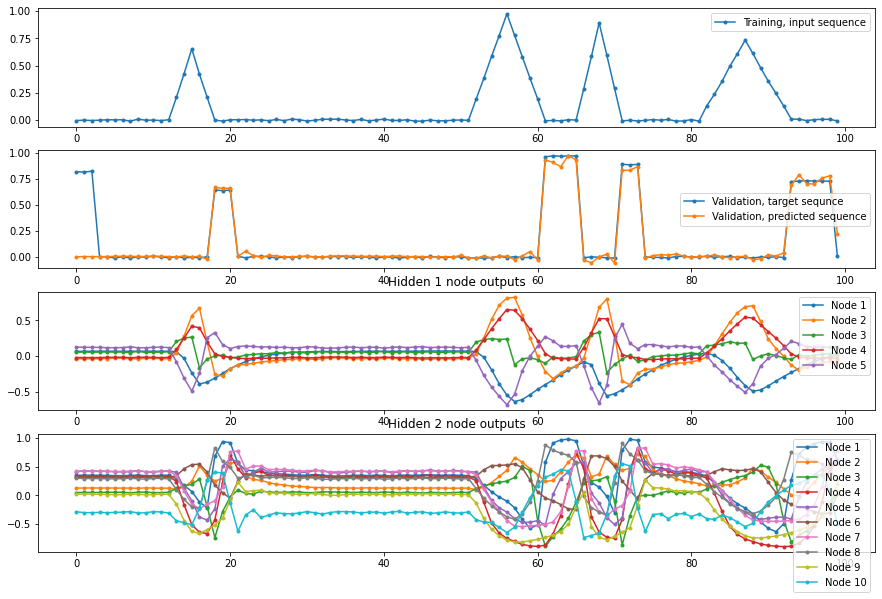

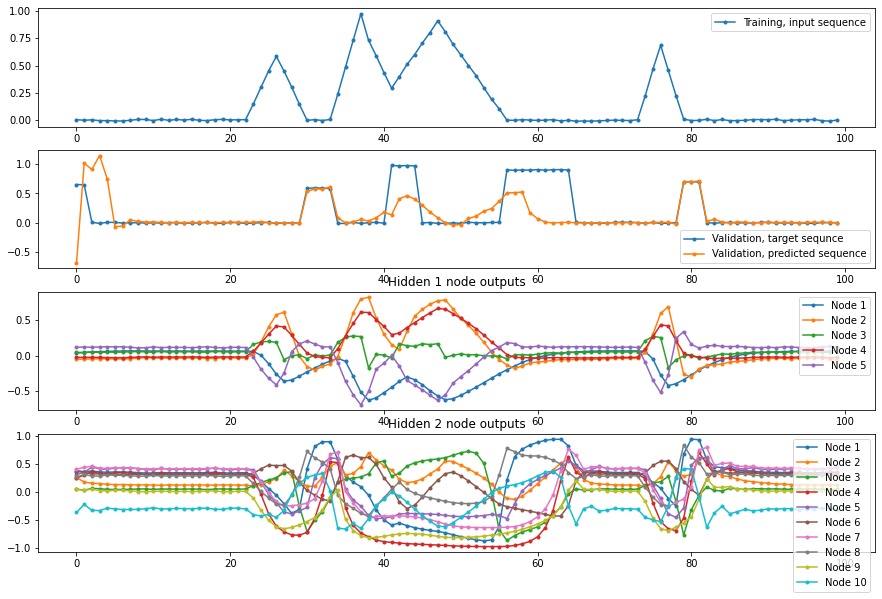

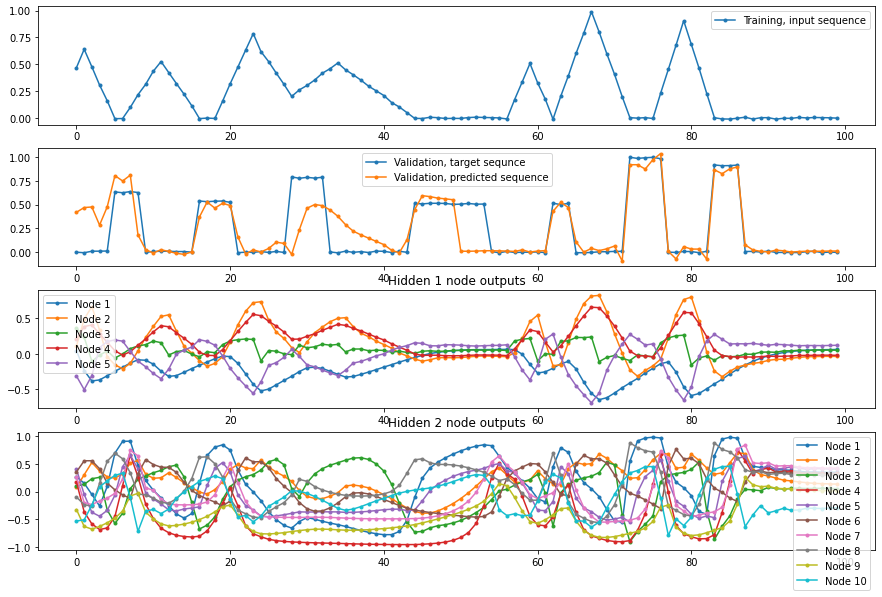

In [166]:
# model = rnn_model_6
# model = rnn_model
# model = gru_model
# model = lstm_model
# model = gru_model_8 
model = gru_model_9 
# model = lstm_model_9

xshow = x_val[:mb]
dshow = d_val[:mb]
dout = np.zeros((mb,tlen))
hidden1 = np.zeros((mb,tlen,nh1))
hidden2 = np.zeros((mb,tlen,nh2))

rnn1 = model.layers[0]
rnn2= model.layers[1]

dense = model.layers[-1]
print('Output weights')
for idx, val in enumerate(dense.get_weights()[0]):
    print('Node ' + str(idx+1) + ': ' + str(val[0]))
print('Bias: ' + str(dense.get_weights()[1][0]))
# sign = K.sign(dense.layer.kernel)[None,None,:,0]



if len(model.layers) > 2 :
    intermediate = K.function([rnn1.input], [rnn1.output, rnn2.output ])
else :
    intermediate = K.function([rnn1.input], [rnn1.output])

for tstep in range(ntsteps):
    t1,t2 = tstep*batchlen,(tstep+1)*batchlen
    inp = xshow[:,t1:t2,None]
    if len(model.layers) > 2 :
        hi,hi2 = intermediate([inp])
        hidden2[:,t1:t2:,:] = hi2
    else :
        hi, = intermediate([inp])
    hidden1[:,t1:t2:,:] = hi
    yi = model.predict(xshow[:,t1:t2,None])
    dout[:,t1:t2] = yi[:,:,0]

t = np.arange(tlen)

# Selection of validation sequence, valid range is [0,mb]
seq = [0,5]
for i in range(*seq):

    plt.figure(figsize=(15,10))

    plt.subplot(4,1,1)
    plt.plot(t,xshow[i],'-',marker='.')
    plt.legend(['Training, input sequence'], loc=0)

    plt.subplot(4,1,2)
    plt.plot(t,dshow[i],'-',marker='.')
    plt.plot(t,dout[i],'-',marker='.')
    plt.legend(['Validation, target sequnce', 'Validation, predicted sequence'], loc=0)

    plt.subplot(4,1,3)
    plt.plot(t,hidden1[i],'-',marker='.')
    plt.title('Hidden 1 node outputs')
    plt.legend(['Node ' + str(i) for i in range(1,hidden1[i].shape[1]+1)])

    if len(model.layers) > 2 :
        plt.subplot(4,1,4)
        plt.plot(t,hidden2[i],'-',marker='.')
        plt.title('Hidden 2 node outputs')
        plt.legend(['Node ' + str(i) for i in range(1,hidden2[i].shape[1]+1)])




In [163]:
# hidden1[i].shape[1]+1
# for indx, val in enumerate(dense.get_weights()[0]):
#     print(indx+1, val[0])

### CellName: Ex5-1 (#12)
### CellType: Exercise
### Cell instruction: Instructions for question 10-11

## RNN: Sampling from a character model
As a final exercise we are going to look into an example where a recurrent network is used to predict a sequence of characters. The model is autoregressive, meaning that the previous values $\ldots, x_{i-2}, x_{i-1}$ is used to predict $x_i$. In the model characters are represented as vectors with the same number of elements as the number of unique characters in the sequence. The input in each sequence step is a single character, represented using "one-hot" coding, that is exactly one vector element is one, representing that particular character. The output is on the other hand a probability vector over all characters, which can be used to sample a character from the predictive distribution. To sample long sequences of characters, we feed one sampled character back into the network, to predict the character after that and so on.

The sequence of characters that we are going to train on is the source code of Tensorflow (C++). The size of the downloaded source code is approximately 14 Mb, which means about 14 million characters in the sequence. The number of unique characters is 103. Therefore the output layer consists of 103 nodes with a softmax activation function. The RNN model itself is rather large, it consists of two layers of 1024 LSTM nodes in each layer. In addition to that there are skip-layer connections from input to second hidden layer and skip connections from first hidden layer to the output layer. In total there are about 13.5 million weights in this model.

This model take too long time to train as part of this lab. It takes days rather than minutes to train! Therefore pre-trained weights are handed out as part of the lab material. This is the file that you needed to download from an external URL!

Given such a model we can now "sample" from it. Given some initial sequence of characters, as a seed, we can run the model for a number of sequence steps in order to find the sequence of predicted characters. But we can do more! Since the output is a vector of probabilities for new characters we can sample from it. As an example assume we only have 5 characters in our vocabulary and the prediction for a new character is:

(0.1, 0.3, 0.5, 0.0, 0.1)

So the character represented by the third position would be selected since it has the largest probability. But if we treat these number as probabilities we can say that half of the times we are going to select the third character, 30% of the time we select the character represented by the second position and so on. To even make things more random we can modify these probabilities such that they become more equal (high temperature) or that the largest probability becomes even larger (small temperature). This temperature parameter *temp* can be changed so that the sampling becomes completely random (very high *temp*) or completely deterministic (very low *temp*).

The code cell below just defines the model and loads the pre-trained weights onto the model. Run the cell! It can take some seconds to do that!


In [167]:
# set of all chars appearing in tensorflow source code:
chars = ['\t', '\n'] + [chr(x) for x in range(32,127)] + ['°', 'θ', 'μ', 'ν', '’', '\ufeff']
char_indices = dict((c, i) for i, c in enumerate(chars))

# build the model: two layers of LSTM
nh = 1024
arch = LSTM
inp = Input(batch_shape=(1, 1, len(chars)))
h1layer = arch(nh, return_sequences=True, stateful=True)
h2layer = arch(nh, stateful=True)
is_skip = True
h1 = h1layer(inp)
i2 = concatenate([inp, h1])
h2 = h2layer(i2)
h1last = Lambda(lambda h: h[:,-1,:])(h1)
rnnout = concatenate([h1last, h2])
beta_var = K.variable(1.0)
d = Dense(len(chars))(rnnout)
d = Lambda(lambda d: d * beta_var)(d)
out = Activation('softmax')(d)
m = Model([inp], [out])
m.compile(loss='categorical_crossentropy', optimizer='adam')
m.summary()

# Load the weights
m.load_weights("charmodel.h5")


The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 1, 103)]        0           []                               
                                                                                                  
 lstm_17 (LSTM)                 (1, 1, 1024)         4620288     ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate) 

### CellName: Ex5-2 (#13)
### CellType: Exercise
### Cell instruction: Instructions for question 10-11

## RNN: Sampling from a character model
In the cell below a function is defined that perform the actual sampling. It takes three parameters as input. (i) the starting sequence *seed*, (ii) the length of the sequence to generate *seqLen* and (iii) the temperature used during sampling *temp*. 

#### Question 10
Run the cell below with the given parameters. **Does it look like C++ code?**

#### Question 11
Change the seed to something else! **What happens when you decrease/increase the temperature (e.g 0.7-1.5)?**


In [194]:
def sampletxt(seed=" ", n=50, t=1.0):
    m.reset_states()
    K.set_value(beta_var, 1/t)

    for c in seed:
        x_pred = np.zeros((1, 1, len(chars)))
        x_pred[0, 0, char_indices[c]] = 1.
        p = m.predict(x_pred, verbose=[0])
        
    txt = []
    for i in range(n):
        preds = p[0].astype('float64')
        preds = preds/np.sum(preds) # some numericol issue
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)
        txt.append(chars[next_index])
        p = m.predict(probas[None,:,:], verbose=0)

    return ''.join(txt)

# seed = " "
# seed = "void "
# seed = "for (int"
seed = 'this is not how one writes C++, however '
seqLen = 500
# temp = 1
# print(seed + sampletxt(seed,seqLen,temp))

temp = [0.000001, 0.1, 0.5, 0.75, 1, 1.5, 2, 5, 10, 100]
for t in temp:
    print('\n{:-^50}\n'.format('Temp: ' + str(t)))
    print(seed + sampletxt(seed,seqLen,t))
    print('\n'+50*'-'+'\n')
    print(seed + sampletxt(seed,seqLen,t))


-------------------Temp: 1e-06--------------------

this is not how one writes C++, however the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a 

--------------------------------------------------

this is not how one writes C++, however the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the context of the input and output is a single to the con

# The report!


### Name
Nils Broman

### Introduction

In this lab we take a look at CNNs and three types of RNNs, investigating the workings and importances of the different types of layer/node structures, and interpret how the networks process the data to produce their outputs.

### Answers to questions

##### Question 1

| Model      |                            |                            |          |              |              | Accuracy  | Params |
| ---------- | :------------------------: | :------------------------: | :------: | :----------: | :----------: | --------- | ------ |
| Original   | Convolution <br> (4, 3, 2) | Convolution <br> (4, 3, 2) | Flatten  | Dense: 10    | Dense: 1     | 0.9935    | 1,209  |

For convolutions: (Filters, Filter size, Pool size)  

##### Question 2

For convolutions: (Filters, Filter size, Pool size)  
| Model      |                            |                            |          |              | Accuracy  | Params |
| ---------- | :------------------------: | :------------------------: | :------: | :----------: | --------- | ------ |
| Reduced    | Convolution <br> (1, 3, 2) | Convolution <br> (1, 3, 2) | Flatten  | Dense: 1     | 0.9838    | 46     |

For convolutions: (Filters, Filter size, Pool size)  

Most parameters are found in the first dense layer, since this fully connects all nodes from pooling after the second convolution (5x5x4=100) to 10 nodes for a total of 1010 parameters, including bias. For this simple classification, this is overkill and it turns out that the model still performs well without it. Each (3x3) filter adds 9 parameters for each channel (plus 1 for bias) and by only using one filter in each convolutional layer instead of four, we reduce the parameters from 40+148=188 to 10+10=20, and the final dense laer from 25x4+1=101 to 25+1=26. This reduced the model to 46 parameters instead of 1209, and still managed to get validation accuracy above 98% most of the time. One could also use smaller filters or increase stride for convolution or use larger pooling sizes or stride for pooling to reduce their outputs, but limiting the model more than this worsened it's performance too much.  

##### Question 3

To get an aditionall visual to the workings of the networks, I created a function that also plot heatmaps of the filters from the convolutional layers. One thing that's really intuitive with CNNs is that the filters look like the pattern they try to recognize. For larger nets with many filters, this might still quickly become more difficult to interpret, since they act on many channels and humans (or at the very least yours truly) have a hard time visualizing images of higher dimensions. The very first layer however is quite clear, especially on grascale images. A very common filter to arrise was simply some form of horizontal line. The images of fives are much more prone to have more pixels with horizontal neighbours, particularly in the upper part of the image, so this is not all too surprising. Another common filter to show up was edge detection along the y-axis, which esentially gives very similar information. Using multiple filters, a combination of these together with edge detection in some other direction frequently appeared.

##### Question 4


For convolutions: (Filters, Filter size, Pool size)  
| Model      |                            |                             |                             |         |               |          | Accuracy  | Log-loss | Params |
| ---------- | :------------------------: | :-------------------------: | :-------------------------: | :-----: | :----------:  | :------: | --------- | -------- | ------ |
| A          | Convolution <br> (8, 3, 2) | Convolution <br> (16, 3, 2) | Convolution <br> (32, 3, 2) | Flatten | Dropout: 0.25 | Dense: 3 | 1         | 0.002528 | 9,347  |
| B          | Convolution <br> (8, 3, 3) | Convolution <br> (16, 3, 3) | Convolution <br> (32, 3, 3) | Flatten | Dropout: 0.25 | Dense: 3 | 1         | 0.002016 | 5,987  |


For the CRT-problem, I added a third layer and increased the number of filters to 8, 16, 32 respectively, and a 25% dropout before the final fully connected layer. By increasing the pool size to 3 I managed to reduce the number of parameters by about 35%. One might still consider this network a bit overkill for the problem at hand, but it's still quite small and all trainings resulted in perfect accuracy.

---
**UPDATED**

Perhaps I have already updated it post hand-in, but the output function was set to softmax in my file. Nonetheless, i reran model B and got similar results.

For convolutions: (Filters, Filter size, Pool size)  
| Model      |                            |                             |                             |         |               |          | Accuracy  | Log-loss | Params |
| ---------- | :------------------------: | :-------------------------: | :-------------------------: | :-----: | :----------:  | :------: | --------- | -------- | ------ |
| B          | Convolution <br> (8, 3, 3) | Convolution <br> (16, 3, 3) | Convolution <br> (32, 3, 3) | Flatten | Dropout: 0.25 | Dense: 3 | 1         | 0.002226 | 5,987  |

---

##### Question 5

For convolutions: (Filters, Filter size, Pool size)  
| Model      |                             |                             |                             |                              |         |           |               |          | Accuracy  | Log-loss | Params  |
| ---------- | :-------------------------: | :-------------------------: | :-------------------------: | :--------------------------: | :-----: | :-------: | :----------:  | :------: | --------- | -------- | ------- |
| A          | Convolution <br> (16, 3, 2) | Convolution <br> (32, 3, 2) | Convolution <br> (64, 3, 2) |                              | Flatten |           | Dropout: 0.25 | Dense: 3 | 0.909     | 0.278282 | 30,211  |
| B          | Convolution <br> (16, 3, 2) | Convolution <br> (32, 3, 2) | Convolution <br> (64, 3, 2) |                              | Flatten | Dense: 10 | Dropout: 0.25 | Dense: 3 | 0.921     | 0.414186 | 46,379  |
| C          | Convolution <br> (16, 3, 2) | Convolution <br> (32, 3, 2) | Convolution <br> (64, 3, 2) | Convolution <br> (128, 3, 2) | Flatten | Dense: 10 | Dropout: 0.25 | Dense: 3 | 0.924     | 0.254822 | 102,315 |
| D          | Convolution <br> (32, 3, 2) | Convolution <br> (64, 3, 2) | Convolution <br> (128, 3, 2)| Convolution <br> (256, 3, 2) | Flatten | Dense: 10 | Dropout: 0.25 | Dense: 3 | 0.91      | 0.341610 | 390,915 |


For the R3 problem I played around with a bunch of models, a few of them shown above. I increased the number of filters in all layers. Adding a 10 node fully connected layer improved the accuracy slightly, but in turn resilted in higher loss (though not too bad) and 50% more parameters. Adding yet another layer reduced the loss and improved the accuracy ever so slightly, but doubled the parameters, and further increasing the number of filters only worsened the model. I tried adjusting the stride and pool size with no success. Due to the nature of the problem I find that rather unsurprising, since this problem is very dependant on spatial accuracy, which is lost witch larger stride and pooling size. The difficult of this problem lays in the fact that the shapes share most features. Essentialy, the only difference is relative length of the sides. I do find it slightly odd that this should be this hard though, since this does tell us quite a lot. 

I tried another approach using a single convolution layer with few filters with averagepooling and three fully connected layers (having some memory of reading somewhere that this would be optimal for approximating division), with the idea on esentially forcing the network to compare the fraction of the side lengths. This was done in the spurr of the moment with not much mor afterthought, but I thought I might as well include it. The results were nothing but disapointing.

---
**UPDATED**

Reran this one as well, which resulted in a slight improvement, but again very similar.

For convolutions: (Filters, Filter size, Pool size)  
| Model      |                             |                             |                             |         |           |               |          | Accuracy  | Log-loss | Params  |
| ---------- | :-------------------------: | :-------------------------: | :-------------------------: | :-----: | :-------: | :----------:  | :------: | --------- | -------- | ------- |
| B          | Convolution <br> (16, 3, 2) | Convolution <br> (32, 3, 2) | Convolution <br> (64, 3, 2) | Flatten | Dense: 10 | Dropout: 0.25 | Dense: 3 | 0.926     | 0.193941 | 46,379  |

---

##### Question 6

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | 
| ----- | ----------- | -------------------- | ------ | ---------------- | 
| sRNN  | 5           | 41                   | 20     | 0.45065          | 

##### Question 7

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| sRNN  | 12          | 181                  | 20     | 0.10168          | 7:39          |
| GRU   | 6           | 169                  | 20     | 0.03665          | 3:07          |
| LSTM  | 6           | 199                  | 20     | 0.03362          | 3:24          |

The GRU and LSTM performed very similarly and beat the sRNN by quite a margin, both in validation error and training time. Since these models have methods of long term memory, this is rather unsurprising. 

##### Question 8

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| GRU   | 3           | 58                   | 20     | 0.06202          | 3:27          |

Using a 3 node GRU, the trained model ended up with the output weights shown in the table below. All weights are positive, around 1 for the first two nodes and 0.5 for the third. The bias is relatively small so the output is esentially the sum of the first two nodes and half of the third. The first node seem to detect the start of a pulse and drop in value (down to negative) up until the end of the pulse, where it starts to increase again. The second node start to increase upon detecting a pulse start, and start decaying after when the output reaches maximum, while the third spike in value on detecting a pulse start, sligthly continue to increase over the pulse and decay after the pulse ends, and finally more quickly upon the output pulse reaching the maximum. Together, this appear to work such that the third node mostly give information about the pulse height, where the first and second node regulate the slope of the output triangular wave through some sort of "integration".  

|Output weights |    |
| ---- | ----------- |
|Node 1| 1.1551816   |
|Node 2| 1.054163    |
|Node 3| 0.42726463  |
|Bias  | -0.028605834|

##### Question 9

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| sRNN  | 10+20       | 761                  | 20 / 30| 0.12015 / 0.10676| 16:59 / 28:12 |
| GRU   | 5+10        | 641                  | 20 / 30| 0.09679 / 0.07856| 4:13 / 6:16   |
| LSTM  | 5+10        | 791                  | 20 / 30| 0.10250 / 0.08141| 4:34 / 6:39   | 

---

**UPDATED**

Using two layers with 5 and 10 nodes, the GRU managed to get test error below 0.1 after 20 epochs whereas the LSTM landed just over. Both networks "solved" the problem with some margin after 30 epochs, whereas a two layer sRNN with 10 and 20 nodes (with similar number of parameters) still didn't quite get there. Here we can really start to see some strengths of GRUs and LSTMs compared to sRNN where the latter performed worse and took over four times as long to train. 

I don't find it completely obvious as to why this reversed problem is that much harder though. Granted, the triangle signal input is more complicated, but the square output signal, at least in my intuition, is simpler to predict. My reasoning is basicly comparing it with classification. Predicting one level (height of square) rather than multiple for the triangle. This is overly simplified of course, and clearly not a good way to look at it. 

Since RNNs struggle with longer dependensies, one argument could be that the triangle shapes are twice the length of the squares, which might make things harder. However, when predicting the triangles that dependency is still there, only in the output rather than the input. 

The answer might simply be that it is easier to produce somwthing that varies with constant input rather than keeping a constant output from varying input.

---

##### Question 10

I'm not all too familiar with C++, but it does indeed look like C++ code!

##### Question 11

I tried varying the temperature from next to 0 up to 100 for a few different seeds, generating two sample texts for each combination. When used with an empty seed, temperatures of 0.5 and lower generated only spaces, at 0.75 mostly spaces but once a character passed, more text followed whereas code was generated instantly at temperature 1. After 1.5 it began to include more and more "typos" and for 5 and above the sampled text only consisted of unstructured random characters. When fed with the seed "for (int" the samples with temperature 0.1 were identical up to the final two characters (for sequence lengths of 100), and between 0.5 up to 1.5 somewhat structured for-loops were generated after which the structure was lost and the output became more and more random. Using the seed "this is not how one writes C++, however" the samples with 0 temperature quickly got stuck in a loop of repeated generated text, 0.1 continued producing "normal text" and at 0.5 something that again looked like code started appearing. 

It seems like using temperatures around somewhere between 0.5 and 1.5 allows to keep the style of the data the network has been trained on, while still allowing for some variation of the samples. Lower temperatures looses "creativity" and higher are too random. It's quite impressive what RNNs are capable of. Sampling useful code is not easy because of the strict syntax and narrow range of interpretation. I've started playing around with the idea of a similar model for generating christmas poems. I feel like this allows for much more flexibility in what's considered useful output. It'll have to wait for next year though!


### Summary

We've seen how the number of parameters depend on the layer structure of the networks. A fully connected layer adds many parameters due to the large ammount of connections, whereas a convolutional layer using shared weights don't add parameters to the same extent. It's more niche in finding specific features, which is very well suited for image analysis, especially when there are cleare geometric differences in the images (e.g. circles and triangles, whith rounded vs sharp edges). They also function in a way that is (relatively) easy to interpret, since they essentially do exactly what the look like, which allows for extracting the output of these filters to observe the workings of the network. When it comes to RNNs, we've seen the perks of using the newer structures such as LSTMs and GRUs that includes ways of long term memory, which allows for quicker and more accurate networks. While looking at the workings of these types of networks, we've also gotten to see where they shine and struggle as well as a few examples of the different types of tasks for which they can be used, such as image classification and segmentation for CNNs as well as predicting time series and sampling text for RNNs. 



















(4, 34.94999999999999)

### Old Tables etc (not part of report)



##### Question 1
| Set        | Accuracy | Sensitivity | Specificity |
| ---------- | -------- | ----------- | ----------- |
| Training   | 1.0000   | 1.0000      | 1.0000      |
| Validation | 0.9935   | 0.9896      | 0.9978      | 

Conv: 4 3x3 (40)-> Conv: 4 3x3 (148) -> Dense: 10 (1010) -> Dense: 1 (11)
Trainable params: 1,209

| Model      | Layers                   |                          |          |              |              | Accuracy  | Params |
| ---------- | :----------------------: | :----------------------: | :------: | :----------: | :----------: | --------- | ------ |
| Reduced    | Convolution <br> (4,3,2) | Convolution <br> (4,3,2) | Flatten  | Dense: 10    | Dense: 1     | 0.9780    | 1,209  |


##### Question 2

| Set        | Accuracy | Sensitivity | Specificity |
| ---------- | -------- | ----------- | ----------- |
| Training   | 0.9810   | 0.9840      | 0.9780      |
| Validation | 0.9838   | 0.9833      | 0.9843      | 

| Model      | Layers                   |                          |          |              | Accuracy  | Params |
| ---------- | :----------------------: | :----------------------: | :------: | :----------: | --------- | ------ |
| Reduced    | Convolution <br> (1,3,2) | Convolution <br> (1,3,2) | Flatten  | Dense: 1     | 0.9780    | 46     |


Conv: 1 3x3 (10)-> Conv: 1 3x3 (10) -> Dense: 1 (26)
Trainable params: 46


##### Question 3

##### Question 4

For the CRT-problem, I found adding a third layer 

| Model A                                                          | Model B                                                           |
| ---------------------------------------------------------------- | ----------------------------------------------------------------- | 
| Convolution <br> Filters: 8  <br> Filtersize: 3 <br> Poolsize: 3 | Convolution <br> Filters: 32 <br> Filtersize: 3 <br> Poolsize: 2  | 
| Convolution <br> Filters: 16 <br> Filtersize: 3 <br> Poolsize: 3 | Convolution <br> Filters: 32 <br> Filtersize: 3 <br> Poolsize: 2  | 
| Convolution <br> Filters: 32 <br> Filtersize: 3 <br> Poolsize: 3 | Convolution <br> Filters: 32 <br> Filtersize: 3 <br> Poolsize: 2  | 
| Flatten                                                          | Flatten                                                           |
| Dropout: 0.25                                                    | Dropout: 0.25                                                     |
| Dense: 3                                                         | Dense: 3                                                          |
| **Parameters: 9,347**                                            | **Parameters: 5,987**                                             | 


c8k3p2 -> c16k3p2 -> c32k3p2 -> flat -> 0.25drop -> d3
Validation  log_loss:   0.002528431431741325
Validation  accuracy:   1
Trainable params: 9,347

c8k3p3 -> c16k3p3 -> c32k3p3 -> flat -> 0.25drop -> d3
Validation  log_loss:   0.0020159541500848446
Validation  accuracy:   1
Trainable params: 5,987

| Model | Parameters | Log-loss | Accuracy |
| ----- | ---------- | -------- | -------- |
| A     | 9,347      | 0.002528 | 1        |
| B     | 5,987      | 0.002016 | 1        |

##### Question 5



c16k3p2 -> c32k3p2 -> c64k3p2 -> flat  -> 0.25drop -> d3
Validation  log_loss:   0.2782825398525661
Validation  accuracy:   0.909 
Total params: 30,211

c16k3p2 -> c32k3p2 -> c64k3p2 -> flat -> d10 -> 0.25drop -> d3
Validation  log_loss:   0.41418653464206456
Validation  accuracy:   0.921  
Total params: 46,379

c16k3p2 -> c32k3p2 -> c64k3p2 -> c128k3p2 -> flat -> d10 -> 0.25drop -> d3
Validation  log_loss:   0.2548227443045971
Validation  accuracy:   0.924 
Trainable params: 102,315


c32k3p2 -> c64k3p2 -> c128k3p2 -> c256k3p2 ->  flat -> d10 -> 0.25drop -> d3
Validation  log_loss:   0.34161018202924276
Validation  accuracy:   0.91 
Trainable params: 390,915



##### Question 6

Layer (type)                Output Shape              Param #

simple_rnn_2 (SimpleRNN)    (10, 50, 5)               35        

time_distributed_9 (TimeDis  (10, 50, 1)              6         
tributed)

Total params: 41
**Trainable params: 41**
Non-trainable params: 0


| Run | epochs | val err | epochs | val err |
| --- | ------ | ------- | ------ | ------- |
| 1   | 20     | 0.45065 | 40     | 0.27422 |
| 2   | 20     | 0.48307 | 40     |    -    |


##### Question 7

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| sRNN  | 12          | 181                  | 20     | 0.10168          | 7:39          |
| GRU   | 6           | 169                  | 20     | 0.03665          | 3:07          |
| LSTM  | 6           | 199                  | 20     | 0.03362          | 3:24          |

##### Question 8

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| GRU   | 3           | 58                   | 20     | 0.06202          | 3:27          |

Weights

|Output weights |    |
| ---- | ----------- |
|Node 1| 1.1551816   |
|Node 2| 1.054163    |
|Node 3| 0.42726463  |
|Bias  | -0.028605834|

##### Question 9

| Model | Layer Nodes | Trainable Parameters | epochs | Validation Error | Training time |
| ----- | ----------- | -------------------- | ------ | ---------------- | ------------- |
| GRU   | 5+10        | 641                  | 20 / 30| 0.09679 / 0.07856| 4:13 / 6:16   |
| LSTM  | 5+10        | 791                  | 20 / 30| 0.10250 / 0.08141| 4:34 / 6:39   | 

##### Question 10

##### Question 11
  